In [206]:
#conda install pytorch torchvision torchaudio -c pytorch

# analyze the graphrag based on parquet

In [1]:
#pip install pyarrow
import pyarrow.parquet as pq

In [4]:
import json
import glob #allows you to find all the pathnames matching a specified pattern
import pandas as pd
from pprint import pprint

**Parquet files are a columnar storage file format that is optimized for use with data processing frameworks like Apache Spark or Pandas in Python, and they are not human-readable like text files.**

**It is efficient for both storage and retrieval, supporting complex nested data structures.** 

In [2]:
!ls "/Users/chenruidong/Documents/Graph Rag/ragtest/output/20240929-155654/artifacts"

clustered_graph.0.graphml
clustered_graph.1.graphml
clustered_graph.2.graphml
clustered_graph.3.graphml
create_base_documents.parquet
create_base_entity_graph.parquet
create_base_extracted_entities.parquet
create_base_text_units.parquet
create_final_communities.parquet
create_final_community_reports.parquet
create_final_documents.parquet
create_final_entities.parquet
create_final_nodes.parquet
create_final_relationships.parquet
create_final_text_units.parquet
create_summarized_entities.parquet
embedded_graph.0.graphml
embedded_graph.1.graphml
embedded_graph.2.graphml
embedded_graph.3.graphml
join_text_units_to_entity_ids.parquet
join_text_units_to_relationship_ids.parquet
lancedb
merged_graph.graphml
stats.json
summarized_graph.graphml


In [6]:
#!ls "/Users/chenruidong/Documents/Graph Rag/ragtest/output/20240912-215836/artifacts/"

In [68]:
files

['/Users/chenruidong/Documents/Graph Rag/ragtest/output/20240929-155654/artifacts/create_final_text_units.parquet',
 '/Users/chenruidong/Documents/Graph Rag/ragtest/output/20240929-155654/artifacts/create_final_nodes.parquet',
 '/Users/chenruidong/Documents/Graph Rag/ragtest/output/20240929-155654/artifacts/create_final_entities.parquet',
 '/Users/chenruidong/Documents/Graph Rag/ragtest/output/20240929-155654/artifacts/create_final_relationships.parquet',
 '/Users/chenruidong/Documents/Graph Rag/ragtest/output/20240929-155654/artifacts/create_final_documents.parquet',
 '/Users/chenruidong/Documents/Graph Rag/ragtest/output/20240929-155654/artifacts/create_final_communities.parquet',
 '/Users/chenruidong/Documents/Graph Rag/ragtest/output/20240929-155654/artifacts/create_final_community_reports.parquet']

In [66]:
file_pattern="/Users/chenruidong/Documents/Graph Rag/ragtest/output/20240929-155654/artifacts/create_final_*"
files= glob.glob(file_pattern) 
pd.read_parquet(files[1])

level              title          type  \
0         0  PROJECT GUTENBERG  ORGANIZATION   
1         0    CHARLES DICKENS        PERSON   
2         0     ARTHUR RACKHAM        PERSON   
3         0  A CHRISTMAS CAROL         EVENT   
4         0       PHILADELPHIA           GEO   
...     ...                ...           ...   
2739      3    MICHAEL S. HART        PERSON   
2740      3  VOLUNTEER SUPPORT         EVENT   
2741      3             EBOOKS         EVENT   
2742      3          VOLUNTEER        PERSON   
2743      3           DONATION         EVENT   

                                            description  \
0     Project Gutenberg is a digital library that of...   
1     Charles Dickens is a renowned author best know...   
2     Arthur Rackham is a renowned illustrator best ...   
3     "A Christmas Carol" is a novella by Charles Di...   
4     Philadelphia is a city in the United States kn...   
...                                                 ...   
2739  Professor Michael S. Hart is the originator of...   
2740  Volunteer support refers to the network of ind...   
2741  eBooks are digital versions of books that are ...   
2742  Volunteers are individuals who contribute thei...   
2743  Donations are contributions made to support th...   

                                              source_id community  degree  \
0     01e84646075b255eab0a34d872336a89,10bab8e9773ee...         2      27   
1     680dd6d2a970a49082fa4f34bf63a34e,7e0f328a83e4c...         2       2   
2     680dd6d2a970a49082fa4f34bf63a34e,95f1f8f5bdbf0...         2       1   
3     3fedcfeffb43c689a33ffa06897ad045,680dd6d2a970a...         2      13   
4     680dd6d2a970a49082fa4f34bf63a34e,95f1f8f5bdbf0...         2       2   
...                                                 ...       ...     ...   
2739                   535f6bed392a62760401b1d4f2aa5e2f      None       1   
2740                   535f6bed392a62760401b1d4f2aa5e2f      None       0   
2741                   535f6bed392a62760401b1d4f2aa5e2f      None       0   
2742                   9e59af410db84b25757e3bf90e036f39      None       1   
2743                   9e59af410db84b25757e3bf90e036f39      None       1   

      human_readable_id                                id  size  \
0                     0  b45241d70f0e43fca764df95b2b81f77    27   
1                     1  4119fd06010c494caa07f439b333f4c5     2   
2                     2  d3835bf3dda84ead99deadbeac5d0d7d     1   
3                     3  077d2820ae1845bcbb1803379a3d1eae    13   
4                     4  3671ea0dd4e84c1a9b02c5ab2c8f4bac     2   
...                 ...                               ...   ...   
2739                681  21ed913271614cbeb1b754cdbbef13af     1   
2740                682  1505dfebbfb04652b0ba57de1a251d67     0   
2741                683  907ec65076e5494a8631efffb81b3178     0   
2742                684  2dc7f6b230db452190a09643ca3d5ec0     1   
2743                685  c20ecfc93b3a4875ade5c92cfe4b94a1     1   

     graph_embedding entity_type                 top_level_node_id  x  y  
0               None        None  b45241d70f0e43fca764df95b2b81f77  0  0  
1               None        None  4119fd06010c494caa07f439b333f4c5  0  0  
2               None        None  d3835bf3dda84ead99deadbeac5d0d7d  0  0  
3               None        None  077d2820ae1845bcbb1803379a3d1eae  0  0  
4               None        None  3671ea0dd4e84c1a9b02c5ab2c8f4bac  0  0  
...              ...         ...                               ... .. ..  
2739            None        None  21ed913271614cbeb1b754cdbbef13af  0  0  
2740            None        None  1505dfebbfb04652b0ba57de1a251d67  0  0  
2741            None        None  907ec65076e5494a8631efffb81b3178  0  0  
2742            None        None  2dc7f6b230db452190a09643ca3d5ec0  0  0  
2743            None        None  c20ecfc93b3a4875ade5c92cfe4b94a1  0  0  

[2744 rows x 15 columns]

In [5]:
file_pattern="/Users/chenruidong/Documents/Graph Rag/ragtest/output/20240929-155654/artifacts/create_final_*"
files= glob.glob(file_pattern) 
#returns a list of all files that match the specified pattern

for file in files:
    dft=pd.read_parquet(file)
    print(file.split("/")[-1])
    print(dft.columns.tolist())
    print()

create_final_text_units.parquet
['id', 'text', 'n_tokens', 'document_ids', 'entity_ids', 'relationship_ids']

create_final_nodes.parquet
['level', 'title', 'type', 'description', 'source_id', 'community', 'degree', 'human_readable_id', 'id', 'size', 'graph_embedding', 'entity_type', 'top_level_node_id', 'x', 'y']

create_final_entities.parquet
['id', 'name', 'type', 'description', 'human_readable_id', 'graph_embedding', 'text_unit_ids', 'description_embedding']

create_final_relationships.parquet
['source', 'target', 'weight', 'description', 'text_unit_ids', 'id', 'human_readable_id', 'source_degree', 'target_degree', 'rank']

create_final_documents.parquet
['id', 'text_unit_ids', 'raw_content', 'title']

create_final_communities.parquet
['id', 'title', 'level', 'raw_community', 'relationship_ids', 'text_unit_ids']

create_final_community_reports.parquet
['community', 'full_content', 'level', 'rank', 'title', 'rank_explanation', 'summary', 'findings', 'full_content_json', 'id']



In [18]:
#create_final_documents.parquet--1
df_documents=pd.read_parquet("/Users/chenruidong/Documents/Graph Rag/ragtest/output/20240929-155654/artifacts/create_final_documents.parquet")
print(df_documents.shape)
df_documents.head()

(1, 4)


id  \
0  c305886e4aa2f6efcf64b57762777055   

                                       text_unit_ids  \
0  [680dd6d2a970a49082fa4f34bf63a34e, 95f1f8f5bdb...   

                                         raw_content     title  
0  ﻿The Project Gutenberg eBook of A Christmas Ca...  book.txt

In [20]:
table1=pq.read_table("/Users/chenruidong/Documents/Graph Rag/ragtest/output/20240929-155654/artifacts/create_final_documents.parquet")
df1=table1.to_pandas()
print(df1)
df_documents["text_unit_ids"]

                                 id  \
0  c305886e4aa2f6efcf64b57762777055   

                                       text_unit_ids  \
0  [680dd6d2a970a49082fa4f34bf63a34e, 95f1f8f5bdb...   

                                         raw_content     title  
0  ﻿The Project Gutenberg eBook of A Christmas Ca...  book.txt  


0    [680dd6d2a970a49082fa4f34bf63a34e, 95f1f8f5bdb...
Name: text_unit_ids, dtype: object

In [11]:
len(df_documents["text_unit_ids"][0]) #chunks

231

In [70]:
df_documents["text_unit_ids"][0]

array(['680dd6d2a970a49082fa4f34bf63a34e',
       '95f1f8f5bdbf0bee3a2c6f2f4a4907f6',
       '3a450ed2b7fb1e5fce66f92698c13824',
       '95b143eba145d91eacae7be3e4ebaf0c',
       'c390f1b92e2888f78b58f6af5b12afa0',
       '4df2a9b3b21d15ed7b34eb5970611c19',
       '4033108a1f27d8d4a3caaa923d459730',
       'dbf014d7f9bcf97aa06ace38b6e41ccb',
       'b6a337c6f91c648c7432dc9e9e01b797',
       '1d57ed63a57765dc6072e2524e0f8c2b',
       '7e0f328a83e4cab1025bc5e27fb32cc6',
       'd222d20d61efac93225744c957c2b52a',
       'e67524adaf0fbbef1a94a6f042c9810c',
       '715dd9466e12d0ff108e1e92464e78a4',
       'bcd3d11eb719b981ca5c674cbc9a123e',
       '547563001cad1df48dfcd4ee4ecc8ee9',
       'd487efa13462a71434c752212586764d',
       'ff097c35b65f9951be1ba68e1bf48cc5',
       'da8b22fcbea495d042facb17b364be42',
       '48c39b1c8d53d887fe367f1401aa68ca',
       '488e8947a768c2d19c17146dcc890534',
       '282f8e11aee6349166c4f948df48e16e',
       'f567abf22400500f5619c095d354a651',
       '28d

In [21]:
#create_final_text_units.parquet--2
df_text_units=pd.read_parquet("/Users/chenruidong/Documents/Graph Rag/ragtest/output/20240929-155654/artifacts/create_final_text_units.parquet")
print(df_text_units.shape)
df_text_units.head()


(231, 6)


id  \
0  680dd6d2a970a49082fa4f34bf63a34e   
1  95f1f8f5bdbf0bee3a2c6f2f4a4907f6   
2  3a450ed2b7fb1e5fce66f92698c13824   
3  95b143eba145d91eacae7be3e4ebaf0c   
4  c390f1b92e2888f78b58f6af5b12afa0   

                                                text  n_tokens  \
0  ﻿The Project Gutenberg eBook of A Christmas Ca...       300   
1   THE PROJECT GUTENBERG EBOOK A CHRISTMAS CAROL...       300   
2  1958,\n  1962, 1964, 1966, 1967, 1969, 1971, 1...       300   
3  .\n  Mr. Fezziwig, a kind-hearted, jovial old ...       300   
4   debtors.\n  Mrs. Cratchit, wife of Bob Cratch...       300   

                         document_ids  \
0  [c305886e4aa2f6efcf64b57762777055]   
1  [c305886e4aa2f6efcf64b57762777055]   
2  [c305886e4aa2f6efcf64b57762777055]   
3  [c305886e4aa2f6efcf64b57762777055]   
4  [c305886e4aa2f6efcf64b57762777055]   

                                          entity_ids  \
0  [b45241d70f0e43fca764df95b2b81f77, 4119fd06010...   
1  [b45241d70f0e43fca764df95b2b81f77, 4119fd06010...   
2  [e1fd0e904a53409aada44442f23a51cb, 9646481f66c...   
3  [e1fd0e904a53409aada44442f23a51cb, 9646481f66c...   
4  [e1fd0e904a53409aada44442f23a51cb, 9646481f66c...   

                                    relationship_ids  
0  [4bc7dc91ede345dfb63d7d4f7ac3554f, 4cbb4e238c5...  
1  [4bc7dc91ede345dfb63d7d4f7ac3554f, 4cbb4e238c5...  
2  [6aedd377efbe4f07ae42e546996e7bfa, 1aa84845627...  
3  [6aedd377efbe4f07ae42e546996e7bfa, f1a65d05dd5...  
4  [1aa8484562784f378851c33843c89687, 28b7457ca5d...

In [23]:
#table2=pq.read_table("/Users/chenruidong/Documents/Graph Rag/ragtest/output/20240912-215836/artifacts/create_final_text_units.parquet")
#df2=table2.to_pandas()
#print(df2)
df_text_units["text"][0]

'\ufeffThe Project Gutenberg eBook of A Christmas Carol\n    \nThis ebook is for the use of anyone anywhere in the United States and\nmost other parts of the world at no cost and with almost no restrictions\nwhatsoever. You may copy it, give it away or re-use it under the terms\nof the Project Gutenberg License included with this ebook or online\nat www.gutenberg.org. If you are not located in the United States,\nyou will have to check the laws of the country where you are located\nbefore using this eBook.\n\nTitle: A Christmas Carol\n\nAuthor: Charles Dickens\n\nIllustrator: Arthur Rackham\n\nRelease date: December 24, 2007 [eBook #24022]\n\nLanguage: English\n\nOriginal publication: Philadelphia and New York: J. B. Lippincott Company,, 1915\n\nCredits: Produced by Suzanne Shell, Janet Blenkinship and the Online\n        Distributed Proofreading Team at http://www.pgdp.net\n\n\n*** START OF THE PROJECT GUTENBERG EBOOK A CHRISTMAS CAROL ***\n\n\n\n\nProduced by Suzanne Shell, Janet Ble

In [24]:
#create_final_entities--3
df_entities=pd.read_parquet("/Users/chenruidong/Documents/Graph Rag/ragtest/output/20240929-155654/artifacts/create_final_entities.parquet")
print(df_entities.shape)
df_entities.head()

(686, 8)


id               name          type  \
0  b45241d70f0e43fca764df95b2b81f77  PROJECT GUTENBERG  ORGANIZATION   
1  4119fd06010c494caa07f439b333f4c5    CHARLES DICKENS        PERSON   
2  d3835bf3dda84ead99deadbeac5d0d7d     ARTHUR RACKHAM        PERSON   
3  077d2820ae1845bcbb1803379a3d1eae  A CHRISTMAS CAROL         EVENT   
4  3671ea0dd4e84c1a9b02c5ab2c8f4bac       PHILADELPHIA           GEO   

                                         description  human_readable_id  \
0  Project Gutenberg is a digital library that of...                  0   
1  Charles Dickens is a renowned author best know...                  1   
2  Arthur Rackham is a renowned illustrator best ...                  2   
3  "A Christmas Carol" is a novella by Charles Di...                  3   
4  Philadelphia is a city in the United States kn...                  4   

  graph_embedding                                      text_unit_ids  \
0            None  [01e84646075b255eab0a34d872336a89, 10bab8e9773...   
1            None  [680dd6d2a970a49082fa4f34bf63a34e, 7e0f328a83e...   
2            None  [680dd6d2a970a49082fa4f34bf63a34e, 95f1f8f5bdb...   
3            None  [3fedcfeffb43c689a33ffa06897ad045, 680dd6d2a97...   
4            None  [680dd6d2a970a49082fa4f34bf63a34e, 95f1f8f5bdb...   

                               description_embedding  
0  [-0.03179475665092468, 0.03128114715218544, 0....  
1  [0.04918724671006203, -0.015707677230238914, 0...  
2  [0.020145233720541, 0.007371002808213234, -0.0...  
3  [-0.0057502551935613155, 0.004031586926430464,...  
4  [0.03219817951321602, -0.012919907458126545, 0...

In [73]:
df_entities["description"][1]


1    Charles Dickens is a renowned author best know...
1    The "COUNTRY ROAD" serves as a significant set...
1    Laughter is portrayed as a contagious and joyf...
Name: description, dtype: object

In [31]:
#create_final_relationships--4
df_relationships=pd.read_parquet("/Users/chenruidong/Documents/Graph Rag/ragtest/output/20240929-155654/artifacts/create_final_relationships.parquet")
print(df_relationships.shape)
df_relationships.head()


(1049, 10)


source                                         target  weight  \
0  PROJECT GUTENBERG                              A CHRISTMAS CAROL    17.0   
1  PROJECT GUTENBERG                                   FULL LICENSE     1.0   
2  PROJECT GUTENBERG                              PROJECT GUTENBERG     5.0   
3  PROJECT GUTENBERG  PROJECT GUTENBERG LITERARY ARCHIVE FOUNDATION    28.0   
4  PROJECT GUTENBERG                               ELECTRONIC WORKS     9.0   

                                         description  \
0  Project Gutenberg is a digital library that of...   
1  The Full Project Gutenberg License outlines th...   
2  Project Gutenberg is an organization dedicated...   
3  The Project Gutenberg Literary Archive Foundat...   
4  Project Gutenberg provides access to a collect...   

                                       text_unit_ids  \
0  [3fedcfeffb43c689a33ffa06897ad045, 680dd6d2a97...   
1                 [50160bdfa976f5b946c699722c81b412]   
2  [01e84646075b255eab0a34d872336a89, 28f242c4515...   
3  [2f918cd94d1825eb5cbdc2a9d3ce094e, 608db27bee1...   
4                 [6968390fb201fda828835d2d1fd4e953]   

                                 id human_readable_id  source_degree  \
0  4bc7dc91ede345dfb63d7d4f7ac3554f                 0             27   
1  0b2b815c9f834aaaac0c341097def9ba                 1             27   
2  424ae71c56024094a02e6fd9bfcfbb04                 2             27   
3  400d10f2ee1d49be9a66efa34dada0e6                 3             27   
4  91deb9f152264e958d106d481ff2e1ee                 4             27   

   target_degree  rank  
0             13    40  
1              1    28  
2             27    54  
3              8    35  
4              3    30

In [34]:
df_relationships["description"][0]

'Project Gutenberg is a digital library that offers free access to a wide range of public domain works, including "A Christmas Carol." This classic novella, written by Charles Dickens, is part of Project Gutenberg\'s collection, allowing it to reach a broad audience. Through its platform, Project Gutenberg ensures that "A Christmas Carol" is readily available for anyone interested in reading this timeless story.'

In [35]:
#create_final_communities--5
df_communities=pd.read_parquet("/Users/chenruidong/Documents/Graph Rag/ragtest/output/20240929-155654/artifacts/create_final_communities.parquet")
print(df_communities.shape)
#df_communities.head()
df_communities


(111, 6)


id          title  level raw_community  \
0      2    Community 2      0             2   
1      0    Community 0      0             0   
2      7    Community 7      0             7   
3      1    Community 1      0             1   
4      6    Community 6      0             6   
..   ...            ...    ...           ...   
106  109  Community 109      3           109   
107  103  Community 103      3           103   
108  110  Community 110      3           110   
109  105  Community 105      3           105   
110  106  Community 106      3           106   

                                      relationship_ids  \
0    [4bc7dc91ede345dfb63d7d4f7ac3554f, 0b2b815c9f8...   
1    [6aedd377efbe4f07ae42e546996e7bfa, 1aa84845627...   
2    [427c3b7458f148d8bace1b768e2b5b7c, 95d506750fd...   
3    [bf0138ccbcc740089a55fd0c24897360, 83cd5df4264...   
4    [65a31e4da283411fb7c971f63d606723, de31810d431...   
..                                                 ...   
106  [6de4c00e48b3480883e696e24df9fda4, 4b3d236101d...   
107  [5d34e587bd2f41dba285e9178f179577, 901b491be73...   
108  [496ae6a894584a6cb12e50b516341788, 72f7974758d...   
109  [ada7cf1171b74ad793f7856febc9c6fe, a7ec8df038d...   
110  [65e5d27c4f8a4dfa8ad92f227964b9cf, 87718ef799a...   

                                         text_unit_ids  
0    [01e84646075b255eab0a34d872336a89,10bab8e9773e...  
1    [1dcbc22876185a4042a5cd112b2a86d2,3a450ed2b7fb...  
2    [95f1f8f5bdbf0bee3a2c6f2f4a4907f6,df32eb616d8d...  
3    [054bdcba0a3690b43609d9226a47f84d,1dcbc2287618...  
4    [0546d296a4d3bb0486bd0c94c01dc9be,0d6bc6e701a0...  
..                                                 ...  
106  [1d57ed63a57765dc6072e2524e0f8c2b,282f8e11aee6...  
107  [45ac76a7dea29addc4542c64d7eae68f,488e8947a768...  
108  [4dcf8737e7f6f7f59a33cf37a61d83f1, 3a45cb48e4f...  
109  [054bdcba0a3690b43609d9226a47f84d,0bc408d042e6...  
110  [7a94921c0b0a908d4eaebd112c62fc86,a55667bb571b...  

[111 rows x 6 columns]

In [10]:
print(df_communities["level"].unique())

[0 1 2 3]


In [36]:
#final_community_reports--6
df_community_reports=pd.read_parquet("/Users/chenruidong/Documents/Graph Rag/ragtest/output/20240929-155654/artifacts/create_final_community_reports.parquet")
print(df_community_reports.shape)
df_community_reports.head()

(111, 10)


community                                       full_content  level  rank  \
0       103  # Scrooge's Nephew and the Spirit of Christmas...      3   4.5   
1       104  # Fezziwig's Festive Community\n\nThe communit...      3   7.5   
2       105  # Scrooge, Dick, and Fezziwig Community\n\nThe...      3   4.0   
3       106  # Cratchit Family and Christmas Pudding\n\nThe...      3   6.5   
4       107  # Cratchit Family Dynamics\n\nThe Cratchit fam...      3   4.5   

                                          title  \
0  Scrooge's Nephew and the Spirit of Christmas   
1                  Fezziwig's Festive Community   
2         Scrooge, Dick, and Fezziwig Community   
3         Cratchit Family and Christmas Pudding   
4                      Cratchit Family Dynamics   

                                    rank_explanation  \
0  The impact severity rating is moderate due to ...   
1  The impact severity rating is high due to the ...   
2  The impact severity rating is moderate due to ...   
3  The impact severity rating is moderate due to ...   
4  The impact severity rating is moderate due to ...   

                                             summary  \
0  The community centers around Scrooge's nephew,...   
1  The community centers around Fezziwig, a chara...   
2  The community centers around the relationships...   
3  The community centers around the Cratchit fami...   
4  The Cratchit family community is centered arou...   

                                            findings  \
0  [{'explanation': 'Scrooge's nephew serves as a...   
1  [{'explanation': 'Fezziwig is celebrated for h...   
2  [{'explanation': 'Dick is portrayed as a chara...   
3  [{'explanation': 'The Christmas pudding is a t...   
4  [{'explanation': 'Bob Cratchit is depicted as ...   

                                   full_content_json  \
0  {\n    "title": "Scrooge's Nephew and the Spir...   
1  {\n    "title": "Fezziwig's Festive Community"...   
2  {\n    "title": "Scrooge, Dick, and Fezziwig C...   
3  {\n    "title": "Cratchit Family and Christmas...   
4  {\n    "title": "Cratchit Family Dynamics",\n ...   

                                     id  
0  879d885c-48c1-497e-9b38-5742206519eb  
1  a1abee29-120d-42f6-9954-927cd994cb13  
2  024cbe82-5b90-49bb-b14f-36e02fc7b728  
3  d7003313-12fb-49e1-81b6-df3330ae277e  
4  e6cc565f-8a31-4e28-aa5b-e0e0c9268194

In [38]:
df_community_reports["full_content"][0]

"# Scrooge's Nephew and the Spirit of Christmas\n\nThe community centers around Scrooge's nephew, who embodies the joy of Christmas and interacts with various entities, including Scrooge and the game Yes and No. The relationships highlight the contrast between the nephew's festive spirit and Scrooge's initial negativity, emphasizing themes of family and holiday cheer.\n\n## The nephew's role as a positive influence\n\nScrooge's nephew serves as a crucial figure in promoting the spirit of Christmas, contrasting sharply with Scrooge's character. His cheerful demeanor and efforts to engage Scrooge in festive activities highlight the importance of family connections during the holiday season. The nephew's attempts to foster a friendly relationship with Scrooge are significant, as they reflect the broader themes of redemption and the transformative power of kindness. His character embodies the essence of Christmas, advocating for goodwill and familial bonds, which are central to the narrati

In [37]:
df_community_reports["findings"][0]

array([{'explanation': "Scrooge's nephew serves as a crucial figure in promoting the spirit of Christmas, contrasting sharply with Scrooge's character. His cheerful demeanor and efforts to engage Scrooge in festive activities highlight the importance of family connections during the holiday season. The nephew's attempts to foster a friendly relationship with Scrooge are significant, as they reflect the broader themes of redemption and the transformative power of kindness. His character embodies the essence of Christmas, advocating for goodwill and familial bonds, which are central to the narrative. [Data: Entities (81); Relationships (326, 263, 605)]", 'summary': "The nephew's role as a positive influence"},
       {'explanation': "The game Yes and No, initiated by Scrooge's nephew, serves as a playful interaction that strengthens their familial bond. This game not only provides entertainment but also symbolizes the nephew's efforts to connect with Scrooge, showcasing a lighter side of

In [13]:
df_community_reports["summary"][0]

'The community centers around Fezziwig, a character known for his joyful spirit and festive gatherings, particularly during Christmas. Key entities include Scrooge, Dick, and various festive events held in the warehouse, showcasing the interconnectedness of joy, generosity, and nostalgia in the narrative.'

In [39]:
#create_final_nodes--7
df_nodes=pd.read_parquet("/Users/chenruidong/Documents/Graph Rag/ragtest/output/20240929-155654/artifacts/create_final_nodes.parquet")
print(df_nodes.shape)
df_nodes.head()

(2744, 15)


level              title          type  \
0      0  PROJECT GUTENBERG  ORGANIZATION   
1      0    CHARLES DICKENS        PERSON   
2      0     ARTHUR RACKHAM        PERSON   
3      0  A CHRISTMAS CAROL         EVENT   
4      0       PHILADELPHIA           GEO   

                                         description  \
0  Project Gutenberg is a digital library that of...   
1  Charles Dickens is a renowned author best know...   
2  Arthur Rackham is a renowned illustrator best ...   
3  "A Christmas Carol" is a novella by Charles Di...   
4  Philadelphia is a city in the United States kn...   

                                           source_id community  degree  \
0  01e84646075b255eab0a34d872336a89,10bab8e9773ee...         2      27   
1  680dd6d2a970a49082fa4f34bf63a34e,7e0f328a83e4c...         2       2   
2  680dd6d2a970a49082fa4f34bf63a34e,95f1f8f5bdbf0...         2       1   
3  3fedcfeffb43c689a33ffa06897ad045,680dd6d2a970a...         2      13   
4  680dd6d2a970a49082fa4f34bf63a34e,95f1f8f5bdbf0...         2       2   

   human_readable_id                                id  size graph_embedding  \
0                  0  b45241d70f0e43fca764df95b2b81f77    27            None   
1                  1  4119fd06010c494caa07f439b333f4c5     2            None   
2                  2  d3835bf3dda84ead99deadbeac5d0d7d     1            None   
3                  3  077d2820ae1845bcbb1803379a3d1eae    13            None   
4                  4  3671ea0dd4e84c1a9b02c5ab2c8f4bac     2            None   

  entity_type                 top_level_node_id  x  y  
0        None  b45241d70f0e43fca764df95b2b81f77  0  0  
1        None  4119fd06010c494caa07f439b333f4c5  0  0  
2        None  d3835bf3dda84ead99deadbeac5d0d7d  0  0  
3        None  077d2820ae1845bcbb1803379a3d1eae  0  0  
4        None  3671ea0dd4e84c1a9b02c5ab2c8f4bac  0  0

In [40]:
#%pip install --quiet pandas neo4j-rust-ext

In [43]:
import pandas as pd
from neo4j import GraphDatabase
import time

NEO4J_URI="neo4j://localhost"
NEO4J_USERNAME="neo4j"
NEO4J_PASSWORD="graphrag"
NEO4J_DATABASE="neo4j"

#create a Neo4j driver
driver=GraphDatabase.driver(NEO4J_URI,auth=(NEO4J_USERNAME,NEO4J_PASSWORD))


In [44]:
def batched_import(statement, df, batch_size=1000):
    """
    Import a dataframe into Neo4j using a batched approach.
    Parameters: statement is the Cypher query to execute, df is the dataframe to import, and batch_size is the number of rows to import in each batch.
    """
    total = len(df)
    start_s = time.time()
    for start in range(0,total, batch_size):
        batch = df.iloc[start: min(start+batch_size,total)]
        result = driver.execute_query("UNWIND $rows AS value " + statement, 
                                      rows=batch.to_dict('records'),
                                      database_=NEO4J_DATABASE)
        print(result.summary.counters)
    print(f'{total} rows in { time.time() - start_s} s.')    
    return total

In [ ]:
# create constraints, idempotent operation

statements = """
create constraint chunk_id if not exists for (c:__Chunk__) require c.id is unique;
create constraint document_id if not exists for (d:__Document__) require d.id is unique;
create constraint entity_id if not exists for (c:__Community__) require c.community is unique;
create constraint entity_id if not exists for (e:__Entity__) require e.id is unique;
create constraint entity_title if not exists for (e:__Entity__) require e.name is unique;
create constraint entity_title if not exists for (e:__Covariate__) require e.title is unique;
create constraint related_id if not exists for ()-[rel:RELATED]->() require rel.id is unique;
""".split(";")

for statement in statements:
    if len((statement or "").strip()) > 0:
        print(statement)
        driver.execute_query(statement)

In [41]:
GRAPHRAG_FOLDER="/Users/chenruidong/Documents/Graph Rag/ragtest/output/20240929-155654/artifacts"

In [42]:
doc_df=pd.read_parquet(f"{GRAPHRAG_FOLDER}/create_final_documents.parquet",
                       columns=["id","title"])
doc_df.head()

id     title
0  c305886e4aa2f6efcf64b57762777055  book.txt

In [56]:
# import documents
statement="""
MERGE (d:__Document__{id:value.id})
SET d += value {.title}
"""

batched_import(statement,doc_df)

{'_contains_updates': True, 'properties_set': 1}
1 rows in 0.4146580696105957 s.


1

In [57]:
#load the text units
text_df = pd.read_parquet(f'{GRAPHRAG_FOLDER}/create_final_text_units.parquet',
                          columns=["id","text","n_tokens","document_ids"])
print(text_df.shape)
text_df.head(2)

(231, 4)


id  \
0  680dd6d2a970a49082fa4f34bf63a34e   
1  95f1f8f5bdbf0bee3a2c6f2f4a4907f6   

                                                text  n_tokens  \
0  ﻿The Project Gutenberg eBook of A Christmas Ca...       300   
1   THE PROJECT GUTENBERG EBOOK A CHRISTMAS CAROL...       300   

                         document_ids  
0  [c305886e4aa2f6efcf64b57762777055]  
1  [c305886e4aa2f6efcf64b57762777055]

In [58]:
statement = """
MERGE (c:__Chunk__ {id:value.id}) 
SET c += value {.text, .n_tokens}
WITH c, value
UNWIND value.document_ids AS document
MATCH (d:__Document__ {id:document})
MERGE (c)-[:PART_OF]->(d)
"""

batched_import(statement, text_df)

{'_contains_updates': True, 'properties_set': 462}
231 rows in 0.2590019702911377 s.


231

In [46]:
#load nodes
entity_df = pd.read_parquet(f'{GRAPHRAG_FOLDER}/create_final_entities.parquet',
                            columns=["name","type","description","human_readable_id","id","description_embedding","text_unit_ids"])
entity_df.head(2)

name          type  \
0  PROJECT GUTENBERG  ORGANIZATION   
1    CHARLES DICKENS        PERSON   

                                         description  human_readable_id  \
0  Project Gutenberg is a digital library that of...                  0   
1  Charles Dickens is a renowned author best know...                  1   

                                 id  \
0  b45241d70f0e43fca764df95b2b81f77   
1  4119fd06010c494caa07f439b333f4c5   

                               description_embedding  \
0  [-0.03179475665092468, 0.03128114715218544, 0....   
1  [0.04918724671006203, -0.015707677230238914, 0...   

                                       text_unit_ids  
0  [01e84646075b255eab0a34d872336a89, 10bab8e9773...  
1  [680dd6d2a970a49082fa4f34bf63a34e, 7e0f328a83e...

In [60]:
entity_statement = """
MERGE (e:__Entity__ {id:value.id})
SET e += value {.human_readable_id, .description, name:replace(value.name,'"','')}
WITH e, value
CALL db.create.setNodeVectorProperty(e, "description_embedding", value.description_embedding)
CALL apoc.create.addLabels(e, case when coalesce(value.type,"") = "" then [] else [apoc.text.upperCamelCase(replace(value.type,'"',''))] end) yield node
UNWIND value.text_unit_ids AS text_unit
MATCH (c:__Chunk__ {id:text_unit})
MERGE (c)-[:HAS_ENTITY]->(e)
"""

batched_import(entity_statement, entity_df)

{'_contains_updates': True, 'labels_added': 639, 'relationships_created': 1435, 'nodes_created': 639, 'properties_set': 2556}
639 rows in 3.623368978500366 s.


639

In [47]:
# import relationships
rel_df = pd.read_parquet(f'{GRAPHRAG_FOLDER}/create_final_relationships.parquet',
                         columns=["source","target","id","rank","weight","human_readable_id","description","text_unit_ids"])
rel_df.head(2)

source             target                                id  \
0  PROJECT GUTENBERG  A CHRISTMAS CAROL  4bc7dc91ede345dfb63d7d4f7ac3554f   
1  PROJECT GUTENBERG       FULL LICENSE  0b2b815c9f834aaaac0c341097def9ba   

   rank  weight human_readable_id  \
0    40    17.0                 0   
1    28     1.0                 1   

                                         description  \
0  Project Gutenberg is a digital library that of...   
1  The Full Project Gutenberg License outlines th...   

                                       text_unit_ids  
0  [3fedcfeffb43c689a33ffa06897ad045, 680dd6d2a97...  
1                 [50160bdfa976f5b946c699722c81b412]

In [67]:
rel_statement = """
    MATCH (source:__Entity__ {name:replace(value.source,'"','')})
    MATCH (target:__Entity__ {name:replace(value.target,'"','')})
    // not necessary to merge on id as there is only one relationship per pair
    MERGE (source)-[rel:RELATED {id: value.id}]->(target)
    SET rel += value {.rank, .weight, .human_readable_id, .description, .text_unit_ids}
    RETURN count(*) as createdRels
"""

batched_import(rel_statement, rel_df)

{'_contains_updates': True, 'properties_set': 4705}
941 rows in 0.18298625946044922 s.


941

In [63]:
# import communities
community_df = pd.read_parquet(f'{GRAPHRAG_FOLDER}/create_final_communities.parquet', 
                     columns=["id","level","title","text_unit_ids","relationship_ids"])

community_df.head(2)

id  level         title                                      text_unit_ids  \
0  12      0  Community 12  [01e84646075b255eab0a34d872336a89,10bab8e9773e...   
1   9      0   Community 9  [1dcbc22876185a4042a5cd112b2a86d2,3a450ed2b7fb...   

                                    relationship_ids  
0  [b823ba1bfe944fa9887edd8faf8a5f17, d0bfb473fdc...  
1  [1ef0c1c59ce946668ccf1a6a4f5ab7cc, d734746e3d6...

In [64]:
statement = """
MERGE (c:__Community__ {community:value.id})
SET c += value {.level, .title}
/*
UNWIND value.text_unit_ids as text_unit_id
MATCH (t:__Chunk__ {id:text_unit_id})
MERGE (c)-[:HAS_CHUNK]->(t)
WITH distinct c, value
*/
WITH *
UNWIND value.relationship_ids as rel_id
MATCH (start:__Entity__)-[:RELATED {id:rel_id}]->(end:__Entity__)
MERGE (start)-[:IN_COMMUNITY]->(c)
MERGE (end)-[:IN_COMMUNITY]->(c)
RETURn count(distinct c) as createdCommunities
"""

batched_import(statement, community_df)

{'_contains_updates': True, 'relationships_created': 2696, 'properties_set': 218}
109 rows in 0.4561309814453125 s.


109

In [48]:
community_report_df = pd.read_parquet(f'{GRAPHRAG_FOLDER}/create_final_community_reports.parquet',
                               columns=["id","community","level","title","summary", "findings","rank","rank_explanation","full_content"])
community_report_df.head(2)

id community  level  \
0  879d885c-48c1-497e-9b38-5742206519eb       103      3   
1  a1abee29-120d-42f6-9954-927cd994cb13       104      3   

                                          title  \
0  Scrooge's Nephew and the Spirit of Christmas   
1                  Fezziwig's Festive Community   

                                             summary  \
0  The community centers around Scrooge's nephew,...   
1  The community centers around Fezziwig, a chara...   

                                            findings  rank  \
0  [{'explanation': 'Scrooge's nephew serves as a...   4.5   
1  [{'explanation': 'Fezziwig is celebrated for h...   7.5   

                                    rank_explanation  \
0  The impact severity rating is moderate due to ...   
1  The impact severity rating is high due to the ...   

                                        full_content  
0  # Scrooge's Nephew and the Spirit of Christmas...  
1  # Fezziwig's Festive Community\n\nThe communit...

In [68]:
# import communities
community_statement = """
MERGE (c:__Community__ {community:value.community})
SET c += value {.level, .title, .rank, .rank_explanation, .full_content, .summary}
WITH c, value
UNWIND range(0, size(value.findings)-1) AS finding_idx
WITH c, value, finding_idx, value.findings[finding_idx] as finding
MERGE (c)-[:HAS_FINDING]->(f:Finding {id:finding_idx})
SET f += finding
"""
batched_import(community_statement, community_report_df)

{'_contains_updates': True, 'properties_set': 1720}
109 rows in 0.19422316551208496 s.


109

In [160]:
#pip install networkx matplotlib


In [1]:
#pip install --upgrade networkx

In [162]:
#pip install python-louvain leidenalg

In [1]:
#pip install --upgrade scipy

#   Analyze the graphrag based on graphml

In [51]:
import scipy
print(scipy.__version__)
print("NetworkX version:", nx.__version__)

1.10.1
NetworkX version: 3.1


**The NetworkX library is a powerful Python package for the creation, manipulation, and study of complex networks (graphs). It provides tools to work with both undirected and directed graphs and offers many functionalities for analyzing the properties and behaviors of networks.**

**NetworkX supports various file formats for reading and writing graphs like GraphML file.**

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

graphml_file="/Users/chenruidong/Documents/Graph Rag/ragtest/output/20240929-155654/artifacts/summarized_graph.graphml"
G=nx.read_graphml(graphml_file)

nodes=G.nodes(data=True)
edges=G.edges(data=True)
print("Nodes:")
for node in nodes:
    print(node)
    print("\n")
    
print("\nEdges:")
for edge in edges:
    print(edge)
    print("\n")



Nodes:
('PROJECT GUTENBERG', {'type': 'ORGANIZATION', 'description': 'Project Gutenberg is a digital library that offers free access to a vast collection of electronic works, primarily consisting of texts that are in the public domain or not protected by U.S. copyright law. Established under the initiative of Professor Michael S. Hart, the library is managed by the Project Gutenberg Literary Archive Foundation and relies heavily on a network of volunteers and donations to transcribe, proofread, and maintain its extensive collection.\n\nThe library provides a wide range of eBooks, including classic literature such as "A Christmas Carol" by Charles Dickens, and promotes the free distribution of these works in various formats, including Plain Vanilla ASCII. Project Gutenberg operates under specific terms of use and intellectual property agreements, ensuring compliance with copyright laws while facilitating the sharing of literature and knowledge.\n\nOverall, Project Gutenberg is dedicated

# The GraphML format is commonly used for exchanging graph data due to its XML structure, allowing for both nodes and edges to contain metadata.

In [3]:
print(len(nodes))
print(len(edges))

686
1049


***The graphml file generated by GraphRag typically stores only nodes and edges with their attributes (like source_id), but not the full text data or paragraphs directly. However, the source_id within the nodes and edges serves as a key or reference that should allow you to link the graph structure back to the original paragraphs or texts in the source dataset.***

In [4]:
if G.number_of_nodes() == 0 or G.number_of_edges() == 0:
    print("The graph is empty. Please check the GraphML file.")
else:
    print(f"Number of nodes: {G.number_of_nodes()}")
    print(f"Number of edges: {G.number_of_edges()}")


Number of nodes: 686
Number of edges: 1049


In [5]:
print(type(nodes))
print(type(edges))

<class 'networkx.classes.reportviews.NodeDataView'>
<class 'networkx.classes.reportviews.EdgeDataView'>


**source_id: Contains an identifier or a set of identifiers that may relate to this node, possibly used for linking or referencing purposes in the database.**

In [6]:
list(nodes)[1]

('CHARLES DICKENS',
 {'type': 'PERSON',
  'description': 'Charles Dickens is a renowned author best known for his classic novella, "A Christmas Carol," which was published in 1843. This work explores profound themes of redemption and the spirit of Christmas, making it a timeless piece of literature that continues to resonate with readers today.',
  'source_id': '680dd6d2a970a49082fa4f34bf63a34e,7e0f328a83e4cab1025bc5e27fb32cc6,95f1f8f5bdbf0bee3a2c6f2f4a4907f6'})

In [7]:
list(nodes)[1][1]

{'type': 'PERSON',
 'description': 'Charles Dickens is a renowned author best known for his classic novella, "A Christmas Carol," which was published in 1843. This work explores profound themes of redemption and the spirit of Christmas, making it a timeless piece of literature that continues to resonate with readers today.',
 'source_id': '680dd6d2a970a49082fa4f34bf63a34e,7e0f328a83e4cab1025bc5e27fb32cc6,95f1f8f5bdbf0bee3a2c6f2f4a4907f6'}

In [8]:
source_ids=list(nodes)[1][1]['source_id']
source_id_list=source_ids.split(",")
source_id_list

['680dd6d2a970a49082fa4f34bf63a34e',
 '7e0f328a83e4cab1025bc5e27fb32cc6',
 '95f1f8f5bdbf0bee3a2c6f2f4a4907f6']

# There is the connection between graphml and parquet

In [10]:
import pandas as pd
documents=pd.read_parquet("/Users/chenruidong/Documents/Graph Rag/ragtest/output/20240929-155654/artifacts/create_base_text_units.parquet")
print(documents.shape)
documents

(231, 5)


id  \
0    680dd6d2a970a49082fa4f34bf63a34e   
1    95f1f8f5bdbf0bee3a2c6f2f4a4907f6   
2    3a450ed2b7fb1e5fce66f92698c13824   
3    95b143eba145d91eacae7be3e4ebaf0c   
4    c390f1b92e2888f78b58f6af5b12afa0   
..                                ...   
226  972bb34ddd371530f06d006480526d3e   
227  2f918cd94d1825eb5cbdc2a9d3ce094e   
228  eec5fc1a2be814473698e220b303dc1b   
229  535f6bed392a62760401b1d4f2aa5e2f   
230  9e59af410db84b25757e3bf90e036f39   

                                                 chunk  \
0    ﻿The Project Gutenberg eBook of A Christmas Ca...   
1     THE PROJECT GUTENBERG EBOOK A CHRISTMAS CAROL...   
2    1958,\n  1962, 1964, 1966, 1967, 1969, 1971, 1...   
3    .\n  Mr. Fezziwig, a kind-hearted, jovial old ...   
4     debtors.\n  Mrs. Cratchit, wife of Bob Cratch...   
..                                                 ...   
226   harmless from all liability, costs and expens...   
227  \nGutenberg Literary Archive Foundation was cr...   
228  . Email contact links and up\nto date contact ...   
229   compliance. To SEND\nDONATIONS or determine t...   
230   could be\nfreely shared with anyone. For fort...   

                             chunk_id                        document_ids  \
0    680dd6d2a970a49082fa4f34bf63a34e  [c305886e4aa2f6efcf64b57762777055]   
1    95f1f8f5bdbf0bee3a2c6f2f4a4907f6  [c305886e4aa2f6efcf64b57762777055]   
2    3a450ed2b7fb1e5fce66f92698c13824  [c305886e4aa2f6efcf64b57762777055]   
3    95b143eba145d91eacae7be3e4ebaf0c  [c305886e4aa2f6efcf64b57762777055]   
4    c390f1b92e2888f78b58f6af5b12afa0  [c305886e4aa2f6efcf64b57762777055]   
..                                ...                                 ...   
226  972bb34ddd371530f06d006480526d3e  [c305886e4aa2f6efcf64b57762777055]   
227  2f918cd94d1825eb5cbdc2a9d3ce094e  [c305886e4aa2f6efcf64b57762777055]   
228  eec5fc1a2be814473698e220b303dc1b  [c305886e4aa2f6efcf64b57762777055]   
229  535f6bed392a62760401b1d4f2aa5e2f  [c305886e4aa2f6efcf64b57762777055]   
230  9e59af410db84b25757e3bf90e036f39  [c305886e4aa2f6efcf64b57762777055]   

     n_tokens  
0         300  
1         300  
2         300  
3         300  
4         300  
..        ...  
226       300  
227       300  
228       300  
229       300  
230       155  

[231 rows x 5 columns]

## The row text information is stored in create_base_text_units.parquet file, we can match the source_id from graphml with id from base_text_units.parquet


In [11]:
match_document=documents[documents["id"].isin(source_id_list)]
match_document

id  \
0   680dd6d2a970a49082fa4f34bf63a34e   
1   95f1f8f5bdbf0bee3a2c6f2f4a4907f6   
10  7e0f328a83e4cab1025bc5e27fb32cc6   

                                                chunk  \
0   ﻿The Project Gutenberg eBook of A Christmas Ca...   
1    THE PROJECT GUTENBERG EBOOK A CHRISTMAS CAROL...   
10  understood, or nothing wonderful can come of t...   

                            chunk_id                        document_ids  \
0   680dd6d2a970a49082fa4f34bf63a34e  [c305886e4aa2f6efcf64b57762777055]   
1   95f1f8f5bdbf0bee3a2c6f2f4a4907f6  [c305886e4aa2f6efcf64b57762777055]   
10  7e0f328a83e4cab1025bc5e27fb32cc6  [c305886e4aa2f6efcf64b57762777055]   

    n_tokens  
0        300  
1        300  
10       300

In [12]:
print(match_document["chunk"].iloc[0])
# the nodes are CHARLES DICKENS

﻿The Project Gutenberg eBook of A Christmas Carol
    
This ebook is for the use of anyone anywhere in the United States and
most other parts of the world at no cost and with almost no restrictions
whatsoever. You may copy it, give it away or re-use it under the terms
of the Project Gutenberg License included with this ebook or online
at www.gutenberg.org. If you are not located in the United States,
you will have to check the laws of the country where you are located
before using this eBook.

Title: A Christmas Carol

Author: Charles Dickens

Illustrator: Arthur Rackham

Release date: December 24, 2007 [eBook #24022]

Language: English

Original publication: Philadelphia and New York: J. B. Lippincott Company,, 1915

Credits: Produced by Suzanne Shell, Janet Blenkinship and the Online
        Distributed Proofreading Team at http://www.pgdp.net


*** START OF THE PROJECT GUTENBERG EBOOK A CHRISTMAS CAROL ***




Produced by Suzanne Shell, Janet Blenkinship and the Online
Distributed P

In [13]:
print(match_document["chunk"].iloc[1])
# the nodes are CHARLES DICKENS

 THE PROJECT GUTENBERG EBOOK A CHRISTMAS CAROL ***




Produced by Suzanne Shell, Janet Blenkinship and the Online
Distributed Proofreading Team at http://www.pgdp.net











  A CHRISTMAS CAROL

  [Illustration: _"How now?" said Scrooge, caustic and cold as ever.
  "What do you want with me?"_]


  A CHRISTMAS CAROL

  [Illustration]

  BY

  CHARLES DICKENS

  [Illustration]

  ILLUSTRATED BY ARTHUR RACKHAM

  [Illustration]

  J. B. LIPPINCOTT COMPANY PHILADELPHIA AND NEW YORK

  FIRST PUBLISHED 1915

  REPRINTED 1923, 1927, 1932, 1933, 1934, 1935, 1947, 1948, 1952, 1958,
  1962, 1964, 1966, 1967, 1969, 1971, 1972, 1973

  ISBN: 0-397-00033-2

  PRINTED IN GREAT BRITAIN




  PREFACE

  I have endeavoured in this Ghostly little book to raise the Ghost of an
  Idea which shall not put my readers out of humour with themselves, with
  each other


In [14]:
print(match_document["chunk"].iloc[2])
# the nodes are CHARLES DICKENS

understood, or nothing wonderful can come of the story I am going to
relate. If we were not perfectly convinced that Hamlet's father died
before the play began, there would be nothing more remarkable in his
taking a stroll at night, in an easterly wind, upon his own ramparts,
than there would be in any other middle-aged gentleman rashly turning
out after dark in a breezy spot--say St. Paul's Churchyard, for
instance--literally to astonish his son's weak mind.

Scrooge never painted out Old Marley's name. There it stood, years
afterwards, above the warehouse door: Scrooge and Marley. The firm was
known as Scrooge and Marley. Sometimes people new to the business called
Scrooge Scrooge, and sometimes Marley, but he answered to both names. It
was all the same to him.

Oh! but he was a tight-fisted hand at the grindstone, Scrooge! a
squeezing, wrenching, grasping, scraping, clutching, covetous old
sinner! Hard and sharp as flint, from which no steel had ever struck out
generous fire; secret

# edges(relationships)

In [15]:
list(edges)[1]

('PROJECT GUTENBERG',
 'FULL LICENSE',
 {'weight': 1.0,
  'description': 'The Full Project Gutenberg License outlines the terms of use and redistribution for works associated with Project Gutenberg',
  'source_id': '50160bdfa976f5b946c699722c81b412'})

### 'PROJECT GUTENBERG', is the source node and this is the starting node of the edge.

### 'FULL LICENSE', represents the target node and this is the node the edge points to.

### weights: numerical value that may indicate the strength of this connection between the nodes.

### description: A brief explanation of what this edge represents

### source_id: this is a unique identifier for the edge, linking it to external references or data sources.

## The GraphML file generated by GraphRag may not explicitly store the action or verb. Instead, it’s using the description and source_id as a way to refer to the connection.

## the source_id could refer to the document or paragraph that explains the relationship but it's not explicitly listed in the edge.

# the description is more of a summary of the relationship

In [16]:
list(edges)[1][2]

{'weight': 1.0,
 'description': 'The Full Project Gutenberg License outlines the terms of use and redistribution for works associated with Project Gutenberg',
 'source_id': '50160bdfa976f5b946c699722c81b412'}

In [17]:
sid2=list(edges)[1][2]["source_id"]
sid2=sid2.split(",")
sid2

['50160bdfa976f5b946c699722c81b412']

In [18]:
match_documents2=documents[documents["id"].isin(sid2)]
match_documents2

id  \
212  50160bdfa976f5b946c699722c81b412   

                                                 chunk  \
212   trademark. If you do not charge anything for\...   

                             chunk_id                        document_ids  \
212  50160bdfa976f5b946c699722c81b412  [c305886e4aa2f6efcf64b57762777055]   

     n_tokens  
212       300

## The graph could be representing relationships at a higher level like descriptions or summaries without encoding specific actions (verbs) explicitly in the edges.

**GraphRag may be focused on document retrieval and text augmentation, meaning that it references back to source texts where the actual relationships (verbs) might be located rather than encoding them directly in the graph.**

In [19]:
print(match_documents2["chunk"].iloc[0])
#'PROJECT GUTENBERG'
#'FULL LICENSE'
#'description': 'The Full Project Gutenberg License outlines the terms of 
# use and redistribution for works associated with Project Gutenberg',

 trademark. If you do not charge anything for
copies of this eBook, complying with the trademark license is very
easy. You may use this eBook for nearly any purpose such as creation
of derivative works, reports, performances and research. Project
Gutenberg eBooks may be modified and printed and given away—you may
do practically ANYTHING in the United States with eBooks not protected
by U.S. copyright law. Redistribution is subject to the trademark
license, especially commercial redistribution.


START: FULL LICENSE

THE FULL PROJECT GUTENBERG LICENSE

PLEASE READ THIS BEFORE YOU DISTRIBUTE OR USE THIS WORK

To protect the Project Gutenberg™ mission of promoting the free
distribution of electronic works, by using or distributing this work
(or any other work associated in any way with the phrase “Project
Gutenberg”), you agree to comply with all the terms of the Full
Project Gutenberg™ License available with this file or online at
www.gutenberg.org/license.

Section 1. General Terms of U

In [20]:
list(edges)[3]

('PROJECT GUTENBERG',
 'PROJECT GUTENBERG LITERARY ARCHIVE FOUNDATION',
 {'weight': 28.0,
  'description': 'The Project Gutenberg Literary Archive Foundation is the governing body responsible for managing the trademark and overseeing the Project Gutenberg organization, which is dedicated to distributing electronic works. This foundation not only manages and oversees the extensive collection of works provided by Project Gutenberg but also owns the copyright for these works. Additionally, it plays a crucial role in supporting and managing donations to ensure the sustainability and secure future of Project Gutenberg and its literary collection. The foundation was established with the specific purpose of providing a stable and secure future for Project Gutenberg, thereby ensuring the continued availability of its resources.',
  'source_id': '2f918cd94d1825eb5cbdc2a9d3ce094e,608db27bee139aaab8ded9989997d00a,6968390fb201fda828835d2d1fd4e953,972bb34ddd371530f06d006480526d3e,9e59af410db84b2575

In [21]:
sid3=list(edges)[3][2]["source_id"]
sid3=sid3.split(",")
sid3

['2f918cd94d1825eb5cbdc2a9d3ce094e',
 '608db27bee139aaab8ded9989997d00a',
 '6968390fb201fda828835d2d1fd4e953',
 '972bb34ddd371530f06d006480526d3e',
 '9e59af410db84b25757e3bf90e036f39',
 'b3c35247f91923027d9bd7d476467f4f',
 'e8cf7d2eec5c3bcbeefc60d9f15941ed',
 'f96b5ddf7fae853edbc4d916f66c623f']

In [22]:
match_documents3=documents[documents["id"].isin(sid3)]
match_documents3

id  \
214  6968390fb201fda828835d2d1fd4e953   
220  608db27bee139aaab8ded9989997d00a   
221  e8cf7d2eec5c3bcbeefc60d9f15941ed   
222  f96b5ddf7fae853edbc4d916f66c623f   
223  b3c35247f91923027d9bd7d476467f4f   
226  972bb34ddd371530f06d006480526d3e   
227  2f918cd94d1825eb5cbdc2a9d3ce094e   
230  9e59af410db84b25757e3bf90e036f39   

                                                 chunk  \
214   who\nagree to be bound by the terms of this a...   
220   charge a reasonable fee for copies of or prov...   
221   notifies\n        you in writing (or by e-mai...   
222   forth in this agreement, you must obtain perm...   
223   Replacement or Refund” described in paragraph...   
226   harmless from all liability, costs and expens...   
227  \nGutenberg Literary Archive Foundation was cr...   
230   could be\nfreely shared with anyone. For fort...   

                             chunk_id                        document_ids  \
214  6968390fb201fda828835d2d1fd4e953  [c305886e4aa2f6efcf64b57762777055]   
220  608db27bee139aaab8ded9989997d00a  [c305886e4aa2f6efcf64b57762777055]   
221  e8cf7d2eec5c3bcbeefc60d9f15941ed  [c305886e4aa2f6efcf64b57762777055]   
222  f96b5ddf7fae853edbc4d916f66c623f  [c305886e4aa2f6efcf64b57762777055]   
223  b3c35247f91923027d9bd7d476467f4f  [c305886e4aa2f6efcf64b57762777055]   
226  972bb34ddd371530f06d006480526d3e  [c305886e4aa2f6efcf64b57762777055]   
227  2f918cd94d1825eb5cbdc2a9d3ce094e  [c305886e4aa2f6efcf64b57762777055]   
230  9e59af410db84b25757e3bf90e036f39  [c305886e4aa2f6efcf64b57762777055]   

     n_tokens  
214       300  
220       300  
221       300  
222       300  
223       300  
226       300  
227       300  
230       155

In [23]:
for i in range(len(match_documents3)):
    if len(match_documents3)>0:
        chunk=match_documents3["chunk"].iloc[i]
        print(chunk)
        print("========================================================")

 who
agree to be bound by the terms of this agreement. There are a few
things that you can do with most Project Gutenberg™ electronic works
even without complying with the full terms of this agreement. See
paragraph 1.C below. There are a lot of things you can do with Project
Gutenberg™ electronic works if you follow the terms of this
agreement and help preserve free future access to Project Gutenberg™
electronic works. See paragraph 1.E below.

1.C. The Project Gutenberg Literary Archive Foundation (“the
Foundation” or PGLAF), owns a compilation copyright in the collection
of Project Gutenberg™ electronic works. Nearly all the individual
works in the collection are in the public domain in the United
States. If an individual work is unprotected by copyright law in the
United States and you are located in the United States, we do not
claim a right to prevent you from copying, distributing, performing,
displaying or creating derivative works based on the work as long as
all references to

# Visualize the nodes and edges

In [24]:
graphml_file = "/Users/chenruidong/Documents/Graph Rag/ragtest/output/20240929-155654/artifacts/summarized_graph.graphml"
G = nx.read_graphml(graphml_file)
# Print node attributes
for node in G.nodes(data=True):
    print(f"Node ID: {node[0]}, Attributes: {node[1]}")
    print()

Node ID: PROJECT GUTENBERG, Attributes: {'type': 'ORGANIZATION', 'description': 'Project Gutenberg is a digital library that offers free access to a vast collection of electronic works, primarily consisting of texts that are in the public domain or not protected by U.S. copyright law. Established under the initiative of Professor Michael S. Hart, the library is managed by the Project Gutenberg Literary Archive Foundation and relies heavily on a network of volunteers and donations to transcribe, proofread, and maintain its extensive collection.\n\nThe library provides a wide range of eBooks, including classic literature such as "A Christmas Carol" by Charles Dickens, and promotes the free distribution of these works in various formats, including Plain Vanilla ASCII. Project Gutenberg operates under specific terms of use and intellectual property agreements, ensuring compliance with copyright laws while facilitating the sharing of literature and knowledge.\n\nOverall, Project Gutenberg i

In [25]:
pos2 = nx.circular_layout(G)
print(len(pos2))
print(pos2)

686
{'PROJECT GUTENBERG': array([ 1.00000000e+00, -1.88454411e-09]), 'CHARLES DICKENS': array([0.99995804, 0.00915903]), 'ARTHUR RACKHAM': array([0.99983221, 0.0183173 ]), 'A CHRISTMAS CAROL': array([0.99962252, 0.02747403]), 'PHILADELPHIA': array([0.99932897, 0.03662845]), 'NEW YORK': array([0.99895155, 0.0457798 ]), 'JANET BLENKINSHIP': array([0.99849033, 0.05492731]), 'ONLINE DISTRIBUTED PROOFREADING TEAM': array([0.99794537, 0.06407022]), 'SUZANNE SHELL': array([0.99731672, 0.07320775]), 'J. B. LIPPINCOTT COMPANY': array([0.99660438, 0.08233914]), 'EBENEZER SCROOGE': array([0.99580842, 0.09146361]), 'GREAT BRITAIN': array([0.99492896, 0.10058041]), 'ISBN 0-397-00033-2': array([0.99396598, 0.10968879]), 'GHOST': array([0.99291962, 0.11878796]), 'BOB CRATCHIT': array([0.99179   , 0.12787716]), 'PETER CRATCHIT': array([0.99057716, 0.13695565]), 'TIM CRATCHIT': array([0.98928124, 0.14602263]), 'MR. FEZZIWIG': array([0.98790234, 0.15507737]), 'FRED': array([0.98644054, 0.16411909]), 'GH

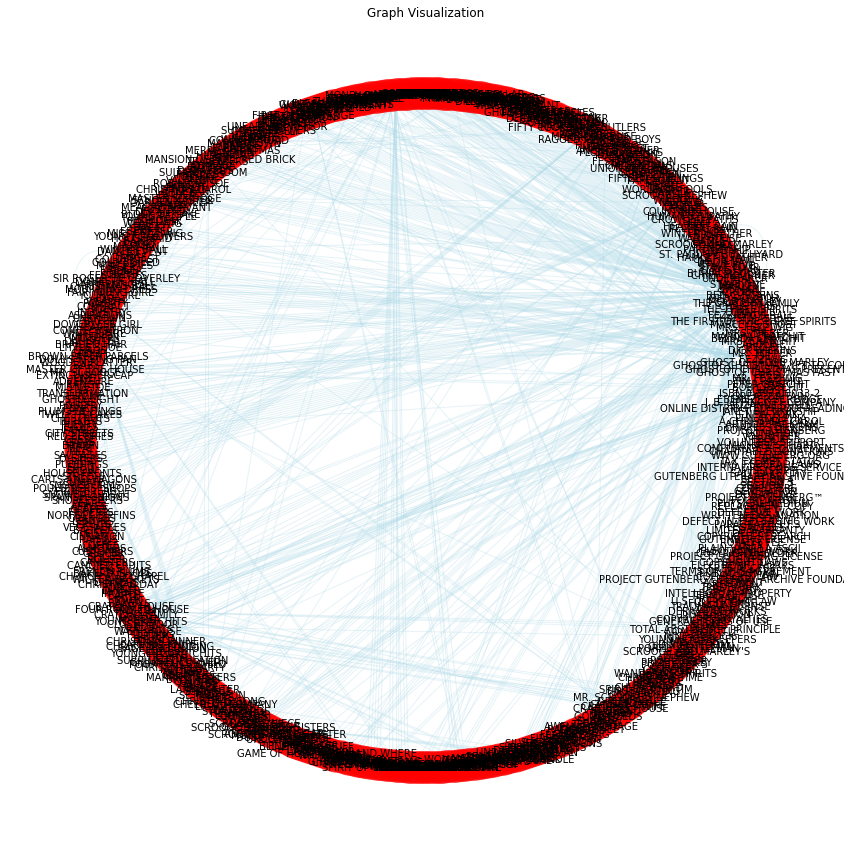

In [26]:
# Visualize the graph
plt.figure(figsize=(15, 15))
pos = nx.circular_layout(G)  # positions for all nodes

# Draw nodes and edges
nx.draw_networkx_nodes(G, pos, node_size=1000, node_color='red',alpha=0.5)
nx.draw_networkx_edges(G, pos, width=1, alpha=0.3, edge_color='lightblue')
nx.draw_networkx_labels(G, pos, font_size=10, font_family='sans-serif')

plt.title("Graph Visualization")
plt.axis('off')  # Turn off the axis
plt.show()

# spring_layout

In [27]:
pos = nx.spring_layout(G,k=0.9, iterations=400,threshold=1e-4)
print(len(pos))
print(pos)

686
{'PROJECT GUTENBERG': array([-0.45134941, -0.02371922]), 'CHARLES DICKENS': array([-0.10901657, -0.01803042]), 'ARTHUR RACKHAM': array([-0.25644392, -0.01358551]), 'A CHRISTMAS CAROL': array([-0.1955014 , -0.01700973]), 'PHILADELPHIA': array([-0.29695061,  0.00240298]), 'NEW YORK': array([-0.38166884,  0.02131047]), 'JANET BLENKINSHIP': array([-0.28747913, -0.01822837]), 'ONLINE DISTRIBUTED PROOFREADING TEAM': array([-0.40639263, -0.00769323]), 'SUZANNE SHELL': array([-0.28788188, -0.03620624]), 'J. B. LIPPINCOTT COMPANY': array([-2.78047174e-01, -1.49976564e-04]), 'EBENEZER SCROOGE': array([ 0.04246334, -0.01782351]), 'GREAT BRITAIN': array([-0.15410134,  0.03477309]), 'ISBN 0-397-00033-2': array([-0.67187184, -0.66554934]), 'GHOST': array([ 0.08361361, -0.01654021]), 'BOB CRATCHIT': array([ 0.06998039, -0.0852734 ]), 'PETER CRATCHIT': array([ 0.04472248, -0.14237383]), 'TIM CRATCHIT': array([ 0.03085573, -0.12921198]), 'MR. FEZZIWIG': array([0.1194357 , 0.02008318]), 'FRED': arra

## The k parameter in spring_layout controls the distance between nodes. Increasing k will increase the repulsive force, potentially helping to spread out the nodes.

## k: Controls the optimal distance between nodes. Higher values make the nodes repel each other more, potentially spreading them out.

## increasing the number of iterations (e.g., to 200 or 500) can help the layout stabilize better.

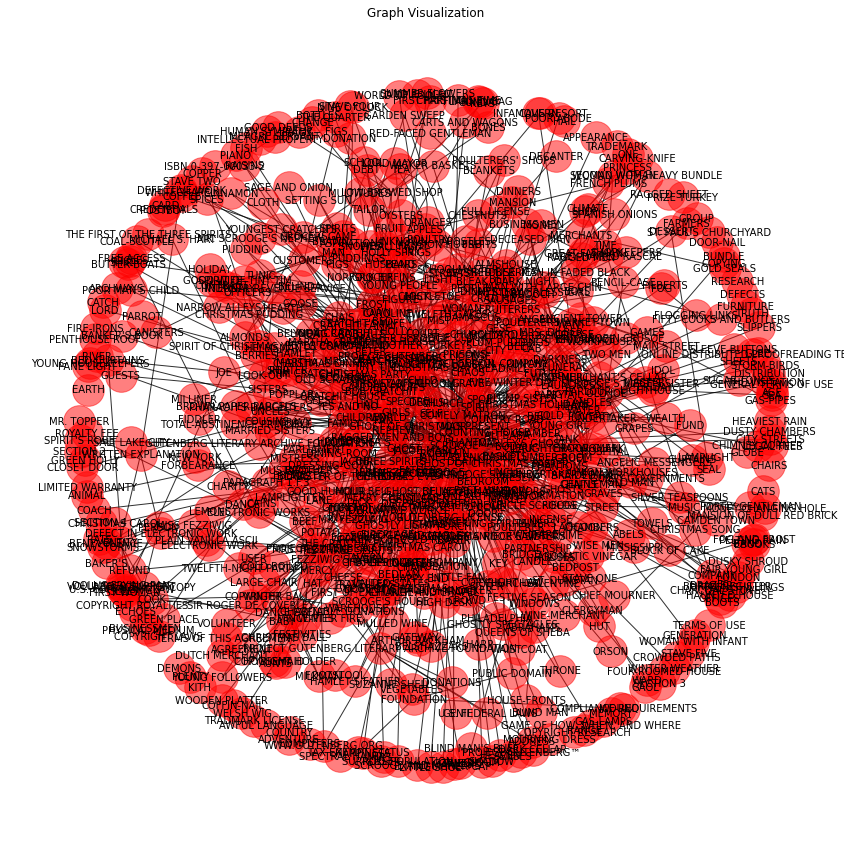

In [28]:
import numpy as np
np.random.seed(2024)

# Visualize the graph
plt.figure(figsize=(15, 15))
pos = nx.spring_layout(G,k=2.5, iterations=400,threshold=1e-4)

nx.draw_networkx_nodes(G, pos, node_size=1000, node_color='red',alpha=0.5)
nx.draw_networkx_edges(G, pos, width=1, alpha=0.8, edge_color='black')
nx.draw_networkx_labels(G, pos, font_size=10, font_family='sans-serif')

plt.title("Graph Visualization")
plt.axis('off')  # Turn off the axis
plt.show()

# Nodes with fewer connections tend to get pushed to the boundary, while highly connected nodes are more likely to remain in the center.

# In force-directed layouts, nodes repel each other while edges pull connected nodes together. Peripheral nodes (with fewer connections) will be repelled to the outer part of the graph if they aren't strongly pulled toward the center.

# Nodes inside the circle (often highly connected nodes) are placed there because they have many connections to other nodes, and the forces acting on them are more balanced 

# The central nodes tend to have more edges, which "pulls" them closer together in the center.

## The algorithm tries to find a balance between the repulsive and attractive forces so that connected nodes remain relatively close, but all nodes are spaced apart enough to avoid clutter.

## The spring_layout is generally a good choice for undirected graphs, but it can lead to cluttered areas, especially if many nodes have similar centrality or connectivity.

In [29]:
import networkx as nx
import matplotlib.pyplot as plt
import leidenalg
import igraph as ig

# Consider to detect the communities

In [30]:
# Convert NetworkX graph to igraph
igraph = ig.Graph.TupleList(G.edges(data=True), directed=False)

# Perform community detection using the Leiden algorithm
partition = leidenalg.find_partition(igraph, leidenalg.ModularityVertexPartition)

In [31]:
print(igraph)

IGRAPH UN-- 610 1049 --
+ attr: name (v)
+ edges (vertex names):
PROJECT GUTENBERG--A CHRISTMAS CAROL, PROJECT GUTENBERG--FULL LICENSE, PROJECT
GUTENBERG--PROJECT GUTENBERG, PROJECT GUTENBERG--PROJECT GUTENBERG LITERARY
ARCHIVE FOUNDATION, PROJECT GUTENBERG--ELECTRONIC WORKS, PROJECT
GUTENBERG--TERMS OF THIS AGREEMENT, PROJECT GUTENBERG--UNITED STATES, PROJECT
GUTENBERG--WORLD, PROJECT GUTENBERG--PROJECT GUTENBERG LICENSE, PROJECT
GUTENBERG--COPYRIGHT HOLDER, PROJECT GUTENBERG--ELECTRONIC WORK, PROJECT
GUTENBERG--USER, PROJECT GUTENBERG--GUTENBERG LICENSE, PROJECT
GUTENBERG--PLAIN VANILLA ASCII, PROJECT GUTENBERG--COPYRIGHT, PROJECT
GUTENBERG--ROYALTY FEE, PROJECT GUTENBERG--COPYRIGHT LAW, PROJECT
GUTENBERG--PARAGRAPH 1.F.3, PROJECT GUTENBERG--AGREEMENT, PROJECT
GUTENBERG--FOUNDATION, PROJECT GUTENBERG--GUTENBERG LITERARY ARCHIVE
FOUNDATION, PROJECT GUTENBERG--MICHAEL S. HART, PROJECT
GUTENBERG--WWW.GUTENBERG.ORG, PROJECT GUTENBERG--EBOOK, PROJECT
GUTENBERG--VOLUNTEER, PROJECT GUTENBER

# 610 nodes and 1049 edges, UN: Indicates that the graph is undirected (U) and contains named vertices (N).

# For NetworkX graph above, it has Number of nodes: 686; Number of edges: 1049

In [32]:
list(G.edges(data=True))

[('PROJECT GUTENBERG',
  'A CHRISTMAS CAROL',
  {'weight': 17.0,
   'description': 'Project Gutenberg is a digital library that offers free access to a wide range of public domain works, including "A Christmas Carol." This classic novella, written by Charles Dickens, is part of Project Gutenberg\'s collection, allowing it to reach a broad audience. Through its platform, Project Gutenberg ensures that "A Christmas Carol" is readily available for anyone interested in reading this timeless story.',
   'source_id': '3fedcfeffb43c689a33ffa06897ad045,680dd6d2a970a49082fa4f34bf63a34e,95f1f8f5bdbf0bee3a2c6f2f4a4907f6'}),
 ('PROJECT GUTENBERG',
  'FULL LICENSE',
  {'weight': 1.0,
   'description': 'The Full Project Gutenberg License outlines the terms of use and redistribution for works associated with Project Gutenberg',
   'source_id': '50160bdfa976f5b946c699722c81b412'}),
 ('PROJECT GUTENBERG',
  'PROJECT GUTENBERG',
  {'weight': 5.0,
   'description': 'Project Gutenberg is an organization d

### igraph=> PROJECT GUTENBERG--A CHRISTMAS CAROL  (only nodes information)

### NetworkX graph=> 'PROJECT GUTENBERG', 'A CHRISTMAS CAROL', {'weight': 17.0, 'description': 'Project...

# create the community via Leiden

## NetworkX and igraph are both popular Python libraries for creating, manipulating, and analyzing complex networks (graphs). 

### NetworkX represents graphs as dictionaries of nodes and edges, allowing for flexible manipulation and easy integration with other data structures in Python.

## igraph uses a more compact representation of graphs, which can be beneficial for memory efficiency.

## igraph is a more efficient library for large-scale graph analysis, optimized for performance. It is well-suited for handling very large graphs and provides efficient implementations of many graph algorithms.

## The Leiden algorithm is a method for community detection in networks, and it is indeed implemented primarily in the igraph library, where it is commonly used for partitioning graphs into communities.

## In igraph, the Leiden algorithm is implemented under the leidenalg module. This means that if you want to use the Leiden algorithm for community detection, you will typically do so with igraph.

**The argument leidenalg.ModularityVertexPartition specifies the type of partitioning method to use, which in this case is based on modularity optimization.**

In [33]:
print(partition)

Clustering with 610 elements and 19 clusters
[ 0] SCROOGE, SHIP, HOLLY, PARTNERSHIP, WINTER WEATHER, UNCLE, WORLD OF FOOLS,
     HEART, PARLIAMENT, BEDLAM, GENTLEMEN, UNION WORKHOUSES, TREADMILL,
     POPULATION, ST. DUNSTAN, HAT, TAVERN, DECEASED PARTNER, BANKER'S BOOK,
     CITY OF LONDON, GATEWAY, CHAMBERS, KEY, WINE-MERCHANT, STAIRS, GRUEL,
     SITTING-ROOM, BEDROOM, LUMBER-ROOM, DRESSING-GOWN, SLIPPERS, CAINS,
     ABELS, PHARAOH'S DAUGHTERS, QUEENS OF SHEBA, ANGELIC MESSENGERS,
     ABRAHAMS, BELSHAZZARS, APOSTLES, BUTTER-BOATS, SENSES, BEEF, MUSTARD,
     CHEESE, POTATO, GRAVY, CHAIR, APPEARANCE, WARD, WISE MEN, POOR ABODE,
     CROWD, INVISIBLE WORLD, WINDOW, CHAMBER, TIME, THE VISITATION, THE CLOCK,
     THE CHIME, THE QUARTER, HOUR BELL, CURTAINS, UNEARTHLY VISITOR, WELFARE,
     BRIDGE, RIVER, MANSION, TRAVELLERS, HIGH-ROAD, LANE, MANSION OF DULL RED
     BRICK, ALI BABA, POPPLAR, DAMASCUS, VALENTINE, ROBIN CRUSOE, FRIDAY,
     PARROT, CHRISTMAS CAROL, FAIR YOUNG GIRL, DOWE

**Below numbers (37, 89, etc.) represent the positions or indices of the nodes in the graph data structure. In NetworkX, nodes are often internally stored as dictionaries where each node has an index or key associated with it.**

**Below 37 is appearing in a list and you see "SCROOGE" in the community output, it means that node 37 in the graph data corresponds to the label "SCROOGE".**

In [34]:
# Get the communities (as lists of nodes)
for community in partition:
    print(community)  # This will print the list of nodes in each community

[37, 89, 160, 215, 216, 217, 218, 219, 220, 221, 222, 225, 227, 229, 231, 233, 234, 235, 236, 237, 238, 239, 240, 241, 243, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 274, 275, 276, 280, 281, 282, 283, 284, 285, 286, 288, 290, 295, 296, 297, 298, 299, 300, 301, 302, 304, 305, 306, 307, 308, 309, 310, 312, 313, 314, 319, 320, 321, 322, 323, 324, 325, 326, 327, 329, 330, 332, 333, 335, 337, 338, 339, 341, 342, 343, 344, 345, 347, 351, 356, 357, 358, 360, 362, 363, 364, 365, 366, 367, 369, 372, 374, 375, 376, 379, 433, 434, 471, 564]
[38, 65, 80, 83, 98, 99, 100, 101, 102, 104, 105, 106, 107, 108, 109, 110, 111, 113, 114, 115, 116, 118, 119, 157, 158, 159, 161, 211, 377, 420, 421, 497, 498, 517, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541, 542, 543, 544, 545]
[1, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 43, 44, 45, 50, 51, 52, 54, 55, 56, 57, 58, 60,

In [35]:
node_index = 37  
node_name = igraph.vs[node_index]['name']
print(f"Node at index {node_index}: {node_name}")


Node at index 37: SCROOGE


In [36]:
igraph.vs[37]

igraph.Vertex(<igraph.Graph object at 0x7feca0c7ea40>, 37, {'name': 'SCROOGE'})

# In iGraph, nodes are stored in a list-like structure, where each node has a numeric index.
# In NetworkX, nodes are often stored as a dictionary where the node names themselves act as the dictionary keys 

In [37]:
node_index = 37  
node_list = list(G.nodes)
node_name = node_list[node_index]
print(f"Node at index {node_index}: {node_name}")

Node at index 37: CHRISTMAS EVE


In [38]:
scrooge_node = G.nodes["SCROOGE"]
scrooge_node  

{'type': 'PERSON',
 'description': 'Ebenezer Scrooge is a central character in Charles Dickens\' "A Christmas Carol," known for his transformation from a miserly, cold-hearted individual to a generous and kind-hearted man, particularly during the Christmas season. Initially depicted as wealthy and unsociable, Scrooge embodies greed and selfishness, showing disdain for Christmas and a lack of compassion towards others, including his underpaid clerk, Bob Cratchit. He is characterized by his strict demeanor, meticulous nature, and a solitary lifestyle, often avoiding human interaction and expressing a cynical view of the holiday spirit.\n\nScrooge\'s journey begins with the haunting visitations of spirits, starting with the ghost of his former business partner, Jacob Marley, who warns him about the consequences of his actions and the potential for redemption. Throughout the story, Scrooge is guided by various spirits, including the Ghost of Christmas Past, the Ghost of Christmas Present, 

## The order of nodes in G.nodes when converted to a list is not necessarily the same as the internal node ordering used by iGraph. 

## The order of nodes in the NetworkX G.nodes list is different from iGraph’s internal node ordering.

In [40]:
degrees = dict(G.degree())
print(len(degrees))

686


In [41]:
degrees

{'PROJECT GUTENBERG': 27,
 'CHARLES DICKENS': 2,
 'ARTHUR RACKHAM': 1,
 'A CHRISTMAS CAROL': 13,
 'PHILADELPHIA': 2,
 'NEW YORK': 2,
 'JANET BLENKINSHIP': 1,
 'ONLINE DISTRIBUTED PROOFREADING TEAM': 1,
 'SUZANNE SHELL': 1,
 'J. B. LIPPINCOTT COMPANY': 3,
 'EBENEZER SCROOGE': 36,
 'GREAT BRITAIN': 4,
 'ISBN 0-397-00033-2': 0,
 'GHOST': 40,
 'BOB CRATCHIT': 32,
 'PETER CRATCHIT': 6,
 'TIM CRATCHIT': 1,
 'MR. FEZZIWIG': 2,
 'FRED': 12,
 'GHOST OF CHRISTMAS PAST': 7,
 'GHOST OF CHRISTMAS PRESENT': 9,
 'GHOST OF CHRISTMAS YET TO COME': 2,
 'GHOST OF JACOB MARLEY': 2,
 'FEZZIWIG': 23,
 'JOE': 4,
 'MR. TOPPER': 0,
 'DICK WILKINS': 3,
 'BELLE': 5,
 'CAROLINE': 5,
 'MRS. CRATCHIT': 21,
 'BELINDA CRATCHIT': 4,
 'MARTHA CRATCHIT': 6,
 'MRS. DILBER': 5,
 'FAN': 5,
 'MRS. FEZZIWIG': 9,
 "MARLEY'S GHOST": 11,
 'THE FIRST OF THE THREE SPIRITS': 0,
 'CHRISTMAS EVE': 6,
 "FEZZIWIG'S BALL": 1,
 'CORNHILL': 2,
 'THE THREE SPIRITS': 1,
 'CHRISTMAS': 56,
 'THE CRATCHIT FAMILY': 3,
 'JACOB MARLEY': 5,
 'OLD

### the term degree refers to the number of edges connected to a particular node in a graph. the degree of a node is simply the count of how many edges are incident to it.

## components refer to the subsets of a graph that are connected. A connected component is a subgraph in which any two vertices are connected to each other by paths, and which is connected to no additional vertices in the supergraph.

## Nodes with a high degree are highly connected. These nodes are often referred to as hubs in the network. (Influential)

# Nodes with high degrees often form the core of communities or clusters. They are likely to belong to the same community or act as bridges between different communities.

In [42]:
degrees = dict(G.degree())
# Find nodes with the highest degrees (most connected nodes)
max_degree_node = max(degrees, key=degrees.get)
max_degree_value = degrees[max_degree_node]
print(f"Node with the highest degree: {max_degree_node} ({max_degree_value} connections)")
# List nodes with degree 1 
print("")

leaf_nodes = [node for node, degree in degrees.items() if degree == 1]
print(f"Leaf nodes: {leaf_nodes}")
print(len(leaf_nodes))

Node with the highest degree: SCROOGE (239 connections)

Leaf nodes: ['ARTHUR RACKHAM', 'JANET BLENKINSHIP', 'ONLINE DISTRIBUTED PROOFREADING TEAM', 'SUZANNE SHELL', 'TIM CRATCHIT', "FEZZIWIG'S BALL", 'THE THREE SPIRITS', 'UNDERTAKER', 'CHIEF MOURNER', 'BURIAL REGISTER', 'CLERGYMAN', 'STAVE FOUR', 'PARTNERSHIP', 'HAMLET', 'WINTER WEATHER', 'WINDOWS', 'MASTER', 'WORLD OF FOOLS', 'UNCLE', 'HEART', 'PARLIAMENT', 'FIFTEEN SHILLINGS', 'BEDLAM', 'UNION WORKHOUSES', 'TREADMILL', 'FESTIVE SEASON', 'FUND', 'GAS-PIPES', 'BRAZIER', 'RAGGED MEN AND BOYS', 'POULTERERS', 'TAILOR', 'BERRIES', 'FIFTY COOKS AND BUTLERS', 'RAGGED MEN', 'ST. DUNSTAN', 'HAT', 'TAVERN', "BANKER'S BOOK", 'DECEASED PARTNER', 'CITY OF LONDON', 'OFFICES', 'FOG AND FROST', 'GHOSTLY SPECTACLES', 'DARK CELLAR', 'KEY', 'STAIRS', 'ECHOES', 'WINE-MERCHANT', 'GRUEL', 'SITTING-ROOM', 'BEDROOM', 'LUMBER-ROOM', 'DRESSING-GOWN', 'SLIPPERS', 'DUTCH MERCHANT', 'ABELS', "PHARAOH'S DAUGHTERS", 'QUEENS OF SHEBA', 'ANGELIC MESSENGERS', 'ABRAHA

In [43]:
components = list(nx.connected_components(G))
print("Connected components:", components)

Connected components: [{'WELFARE', 'SCROOGE AND MARLEY', 'CURTAINS', 'SPECTRE', 'WINTER FIRE', 'PARLIAMENT', 'DOMESTIC BALL', 'POOR ABODE', 'SAGE AND ONION', 'INTERNAL REVENUE SERVICE', 'CANISTERS', 'TOTAL-ABSTINENCE PRINCIPLE', 'CORNER', 'FIRST WOMAN', 'PEARS', 'CHRISTMAS TIME', 'GEESE', 'FUND', 'CANDLES', 'BELT', 'GRAVES', 'MAN IN FADED BLACK', 'BUSINESSMEN', 'SILVER TEASPOONS', "SCROOGE AND MARLEY'S", 'GREY-HAIRED RASCAL', 'TEA', 'PHYSICAL MEDIUM', 'TOWELS', 'DRESSING-GOWN', 'PETER CRATCHIT', 'GAOL', 'UNEARTHLY VISITOR', 'PHANTOM', 'SITTING-ROOM', 'FLOGGING LINKS', 'MONEY', 'STAVE FOUR', 'TWO MEN', 'COUNTRY ROAD', 'WISE MEN', "POULTERERS' SHOPS", 'SNOW', 'MISTLETOE', 'IVY', 'GAS-PIPES', "CRATCHIT'S HOUSE", 'BLIND MAN', 'BROWN-PAPER PARCELS', 'MICHAEL S. HART', 'MILKMAN', 'SLIPPERS', 'TINY TIM', 'CITY OF LONDON', 'WARD', 'HEARTH', 'RAGS', 'OLD JOE', 'ORANGES', 'SPOIL', 'MASTER SCROOGE', 'GREEN PLACE', 'THE QUARTER', 'MIST', 'CHURCH', 'GROCERS', 'WINTER DAY', 'KNOCKER', 'ONE', 'DEFECT

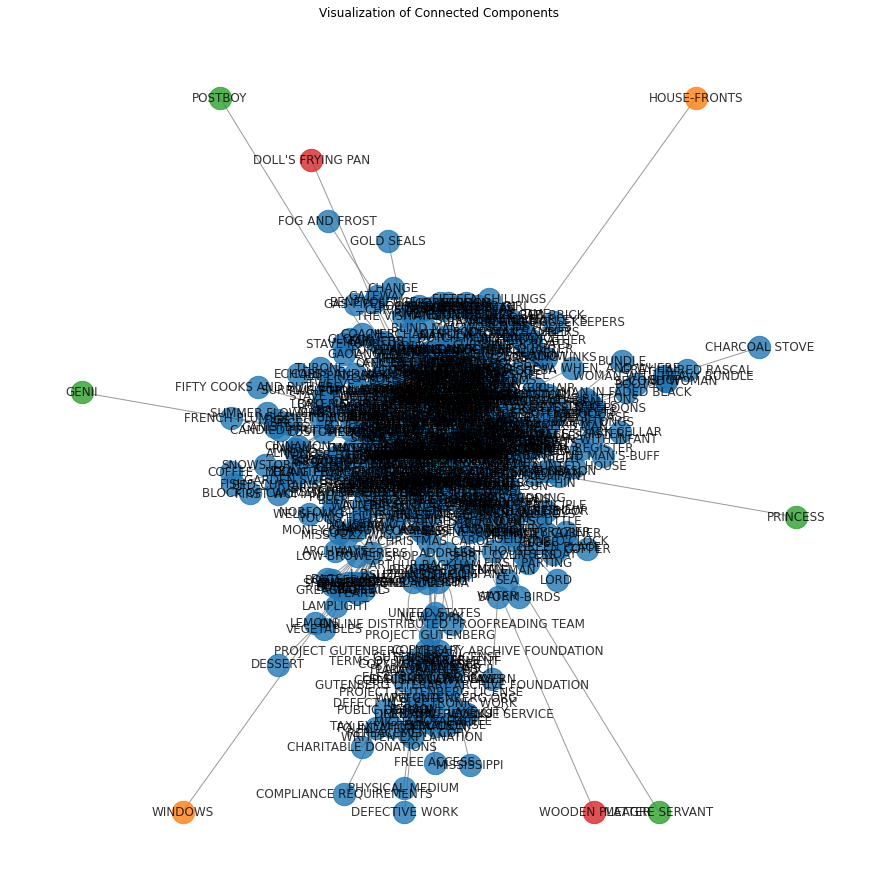

In [78]:
import networkx as nx
import matplotlib.pyplot as plt

# Assuming G is your original graph
components = list(nx.connected_components(G))  # Find connected components

# Create a color map for visualization
colors = plt.cm.get_cmap('tab10', len(components))  # Use colormap with distinct colors

# Set up the plot
plt.figure(figsize=(12, 12))

# Loop through each connected component
for i, component in enumerate(components):
    # Create a subgraph for the component
    subgraph = G.subgraph(component)
    
    # Generate positions for the nodes in the subgraph
    pos = nx.spring_layout(subgraph)
    
    # Draw the subgraph
    nx.draw(subgraph, pos, with_labels=True, node_color=[colors(i)], edge_color='gray', node_size=500, alpha=0.8)

plt.title("Visualization of Connected Components")
plt.show()


# In an undirected graph, connected components are disjoint sets of nodes such that there are no connections between nodes in different components.

## Nodes in one component are not connected to nodes in another component. In other words, there are no edges between different connected components.

## Components are useful when you're analyzing graph connectivity and want to identify groups of nodes that are disconnected from others.

In [44]:
len(components)

81

### Finding connected components helps in identifying isolated subgraphs

### The nx.connected_components(G) function returns a list of sets, where each set represents a connected component of the graph G.

## Unlike connected components, communities are not necessarily fully connected. For instance, two nodes in the same community may not have a direct path between them, but they are still considered part of the same community because they are part of the same dense substructure.

## The result of community detection is a partition where nodes within the same community have more internal connections compared to their connections to other communities.

# Connected components help identify fully disconnected subgraphs while communities help find dense clusters of nodes that share more connections internally.

In [48]:
# Create a dictionary to hold community members
communities = {}
i=0
# Populate the communities dictionary
for node_index in range(len(partition)):
    community_id = partition[node_index]
    print(community_id)
    i+=1
    print(i)
    node_id = igraph.vs[node_index]['name']  # Access node ID directly


[37, 89, 160, 215, 216, 217, 218, 219, 220, 221, 222, 225, 227, 229, 231, 233, 234, 235, 236, 237, 238, 239, 240, 241, 243, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 274, 275, 276, 280, 281, 282, 283, 284, 285, 286, 288, 290, 295, 296, 297, 298, 299, 300, 301, 302, 304, 305, 306, 307, 308, 309, 310, 312, 313, 314, 319, 320, 321, 322, 323, 324, 325, 326, 327, 329, 330, 332, 333, 335, 337, 338, 339, 341, 342, 343, 344, 345, 347, 351, 356, 357, 358, 360, 362, 363, 364, 365, 366, 367, 369, 372, 374, 375, 376, 379, 433, 434, 471, 564]
1
[38, 65, 80, 83, 98, 99, 100, 101, 102, 104, 105, 106, 107, 108, 109, 110, 111, 113, 114, 115, 116, 118, 119, 157, 158, 159, 161, 211, 377, 420, 421, 497, 498, 517, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541, 542, 543, 544, 545]
2
[1, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 43, 44, 45, 50, 51, 52, 54, 55, 56, 57, 58,

In [49]:
j=0
for node_index in range(len(partition)):
    community_id = partition[node_index]
    #print(community_id)
    node_id = igraph.vs[node_index]['name']
    print(node_id)
    j+=1
    print(j)

PROJECT GUTENBERG
1
A CHRISTMAS CAROL
2
FULL LICENSE
3
PROJECT GUTENBERG LITERARY ARCHIVE FOUNDATION
4
ELECTRONIC WORKS
5
TERMS OF THIS AGREEMENT
6
UNITED STATES
7
WORLD
8
PROJECT GUTENBERG LICENSE
9
COPYRIGHT HOLDER
10
ELECTRONIC WORK
11
USER
12
GUTENBERG LICENSE
13
PLAIN VANILLA ASCII
14
COPYRIGHT
15
ROYALTY FEE
16
COPYRIGHT LAW
17
PARAGRAPH 1.F.3
18
AGREEMENT
19


In [51]:
# Create a dictionary to hold community members
communities = {}
for node_index in range(len(partition)):
    community_id = partition[node_index]  # Get the community ID for the node
    community_key=tuple(community_id)
    node_id = igraph.vs[node_index]['name']  # Access node ID directly
    if community_key not in communities:
        communities[community_key] = []
    communities[community_key].append(node_id)  # Append the node ID

for community_id, members in communities.items():
    members_formatted = ', '.join(members)  
    print(f"Community {community_id}: [{members_formatted}]")  


Community (37, 89, 160, 215, 216, 217, 218, 219, 220, 221, 222, 225, 227, 229, 231, 233, 234, 235, 236, 237, 238, 239, 240, 241, 243, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 274, 275, 276, 280, 281, 282, 283, 284, 285, 286, 288, 290, 295, 296, 297, 298, 299, 300, 301, 302, 304, 305, 306, 307, 308, 309, 310, 312, 313, 314, 319, 320, 321, 322, 323, 324, 325, 326, 327, 329, 330, 332, 333, 335, 337, 338, 339, 341, 342, 343, 344, 345, 347, 351, 356, 357, 358, 360, 362, 363, 364, 365, 366, 367, 369, 372, 374, 375, 376, 379, 433, 434, 471, 564): [PROJECT GUTENBERG]
Community (38, 65, 80, 83, 98, 99, 100, 101, 102, 104, 105, 106, 107, 108, 109, 110, 111, 113, 114, 115, 116, 118, 119, 157, 158, 159, 161, 211, 377, 420, 421, 497, 498, 517, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541, 542, 543, 544, 545): [A CHRISTMAS CAROL]
Community (1, 26, 27, 28, 29,

In [52]:
colors = [partition[node_index] for node_index in range(len(partition))] 
print(len(colors))
G.number_of_nodes()

19


686

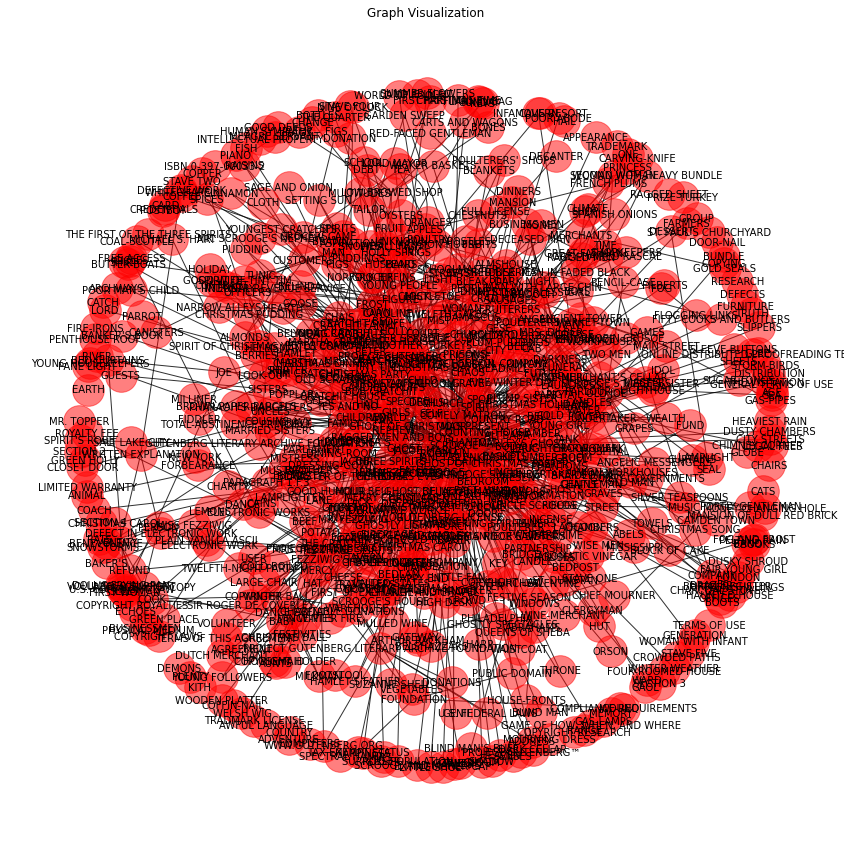

In [53]:
import numpy as np
np.random.seed(2024)

# Visualize the graph
plt.figure(figsize=(15, 15))
pos = nx.spring_layout(G,k=2.5, iterations=400,threshold=1e-4)

nx.draw_networkx_nodes(G, pos, node_size=1000, node_color='red',alpha=0.5)
nx.draw_networkx_edges(G, pos, width=1, alpha=0.8, edge_color='black')
nx.draw_networkx_labels(G, pos, font_size=10, font_family='sans-serif')

plt.title("Graph Visualization")
plt.axis('off')  # Turn off the axis
plt.show()

In [54]:
print(partition)

Clustering with 610 elements and 19 clusters
[ 0] SCROOGE, SHIP, HOLLY, PARTNERSHIP, WINTER WEATHER, UNCLE, WORLD OF FOOLS,
     HEART, PARLIAMENT, BEDLAM, GENTLEMEN, UNION WORKHOUSES, TREADMILL,
     POPULATION, ST. DUNSTAN, HAT, TAVERN, DECEASED PARTNER, BANKER'S BOOK,
     CITY OF LONDON, GATEWAY, CHAMBERS, KEY, WINE-MERCHANT, STAIRS, GRUEL,
     SITTING-ROOM, BEDROOM, LUMBER-ROOM, DRESSING-GOWN, SLIPPERS, CAINS,
     ABELS, PHARAOH'S DAUGHTERS, QUEENS OF SHEBA, ANGELIC MESSENGERS,
     ABRAHAMS, BELSHAZZARS, APOSTLES, BUTTER-BOATS, SENSES, BEEF, MUSTARD,
     CHEESE, POTATO, GRAVY, CHAIR, APPEARANCE, WARD, WISE MEN, POOR ABODE,
     CROWD, INVISIBLE WORLD, WINDOW, CHAMBER, TIME, THE VISITATION, THE CLOCK,
     THE CHIME, THE QUARTER, HOUR BELL, CURTAINS, UNEARTHLY VISITOR, WELFARE,
     BRIDGE, RIVER, MANSION, TRAVELLERS, HIGH-ROAD, LANE, MANSION OF DULL RED
     BRICK, ALI BABA, POPPLAR, DAMASCUS, VALENTINE, ROBIN CRUSOE, FRIDAY,
     PARROT, CHRISTMAS CAROL, FAIR YOUNG GIRL, DOWE

In [55]:
list(G.nodes)[37]

'CHRISTMAS EVE'

In [56]:
for community_id, community in enumerate(partition):
    for node_index in community:
        node_name = list(G.nodes)[node_index]
        print(node_name)

CHRISTMAS EVE
HEART
CAINS
THE QUARTER
THE CLOCK
HOUR BELL
CURTAINS
BED
UNEARTHLY VISITOR
TUNIC
BAND
FIGURE
LIGHT
WINTER DAY
FIELDS
BRIDGE
RIVER
FARMERS
MERRY CHRISTMAS
MANSION
CHILD
HIGH-ROAD
LANE
MANSION OF DULL RED BRICK
BOY
POPPLAR
HOUSE
DAMASCUS
SULTAN'S GROOM
PRINCESS
ORSON
GENII
VALENTINE
ROBIN CRUSOE
FRIDAY
PARROT
CHRISTMAS CAROL
LITTLE FAN
COACH
FATHER
SCHOOLMASTER
GARDEN SWEEP
CHAIS
MEAGRE SERVANT
POSTBOY
DECANTER
BLOCK OF CAKE
YOUNG PEOPLE
SCHOOL
HIGH DESK
WELSH WIG
DICK
EBENEZER
MISS FEZZIWIG
YOUNG FOLLOWERS
MILKMAN
WINTER BALL
DANCE EVENT
GIRL
DANCE
COLD ROAST
COLD BOILED
BEER
PORTER
CHRISTMAS BALL
MOURNING DRESS
FAIR YOUNG GIRL
YOUNG GIRL
IDOL
WEALTH
POVERTY
CONTRACT
INDUSTRY
ASPIRATIONS
UNKNOWN
TRUTH
DOWERLESS GIRL
HEAVEN
COMELY MATRON
CHILDREN
MOTHER
DAUGHTER
BROWN-PAPER PARCELS
DOLL'S FRYING PAN
WOODEN PLATTER
BABY
MASTER OF THE HOUSE
MR. SCROOGE
EXTINGUISHER-CAP
ONE
ADVENTURE
MISTLETOE
IVY
THRONE
GHOSTLY LIGHT
POULTRY
PLUM-PUDDINGS
TWELFTH-CAKES
CHESTNUTS
PLENTY
ICICLE

In [57]:
community_assignments = {}
for community_id, community in enumerate(partition):
    for node_index in community:
        node_name = list(G.nodes)[node_index]  # Map node index to node name
        community_assignments[node_name] = community_id
community_assignments

{'CHRISTMAS EVE': 0,
 'HEART': 0,
 'CAINS': 0,
 'THE QUARTER': 0,
 'THE CLOCK': 0,
 'HOUR BELL': 0,
 'CURTAINS': 0,
 'BED': 0,
 'UNEARTHLY VISITOR': 0,
 'TUNIC': 0,
 'BAND': 0,
 'FIGURE': 0,
 'LIGHT': 0,
 'WINTER DAY': 0,
 'FIELDS': 0,
 'BRIDGE': 0,
 'RIVER': 0,
 'FARMERS': 0,
 'MERRY CHRISTMAS': 0,
 'MANSION': 0,
 'CHILD': 0,
 'HIGH-ROAD': 0,
 'LANE': 0,
 'MANSION OF DULL RED BRICK': 0,
 'BOY': 0,
 'POPPLAR': 0,
 'HOUSE': 0,
 'DAMASCUS': 0,
 "SULTAN'S GROOM": 0,
 'PRINCESS': 0,
 'ORSON': 0,
 'GENII': 0,
 'VALENTINE': 0,
 'ROBIN CRUSOE': 0,
 'FRIDAY': 0,
 'PARROT': 0,
 'CHRISTMAS CAROL': 0,
 'LITTLE FAN': 0,
 'COACH': 0,
 'FATHER': 0,
 'SCHOOLMASTER': 0,
 'GARDEN SWEEP': 0,
 'CHAIS': 0,
 'MEAGRE SERVANT': 0,
 'POSTBOY': 0,
 'DECANTER': 0,
 'BLOCK OF CAKE': 0,
 'YOUNG PEOPLE': 0,
 'SCHOOL': 0,
 'HIGH DESK': 0,
 'WELSH WIG': 0,
 'DICK': 0,
 'EBENEZER': 0,
 'MISS FEZZIWIG': 0,
 'YOUNG FOLLOWERS': 0,
 'MILKMAN': 0,
 'WINTER BALL': 0,
 'DANCE EVENT': 0,
 'GIRL': 0,
 'DANCE': 0,
 'COLD ROAST

In [58]:
len(set(community_assignments.values()))

19

In [59]:
community_assignments.items()

dict_items([('CHRISTMAS EVE', 0), ('HEART', 0), ('CAINS', 0), ('THE QUARTER', 0), ('THE CLOCK', 0), ('HOUR BELL', 0), ('CURTAINS', 0), ('BED', 0), ('UNEARTHLY VISITOR', 0), ('TUNIC', 0), ('BAND', 0), ('FIGURE', 0), ('LIGHT', 0), ('WINTER DAY', 0), ('FIELDS', 0), ('BRIDGE', 0), ('RIVER', 0), ('FARMERS', 0), ('MERRY CHRISTMAS', 0), ('MANSION', 0), ('CHILD', 0), ('HIGH-ROAD', 0), ('LANE', 0), ('MANSION OF DULL RED BRICK', 0), ('BOY', 0), ('POPPLAR', 0), ('HOUSE', 0), ('DAMASCUS', 0), ("SULTAN'S GROOM", 0), ('PRINCESS', 0), ('ORSON', 0), ('GENII', 0), ('VALENTINE', 0), ('ROBIN CRUSOE', 0), ('FRIDAY', 0), ('PARROT', 0), ('CHRISTMAS CAROL', 0), ('LITTLE FAN', 0), ('COACH', 0), ('FATHER', 0), ('SCHOOLMASTER', 0), ('GARDEN SWEEP', 0), ('CHAIS', 0), ('MEAGRE SERVANT', 0), ('POSTBOY', 0), ('DECANTER', 0), ('BLOCK OF CAKE', 0), ('YOUNG PEOPLE', 0), ('SCHOOL', 0), ('HIGH DESK', 0), ('WELSH WIG', 0), ('DICK', 0), ('EBENEZER', 0), ('MISS FEZZIWIG', 0), ('YOUNG FOLLOWERS', 0), ('MILKMAN', 0), ('WINTE

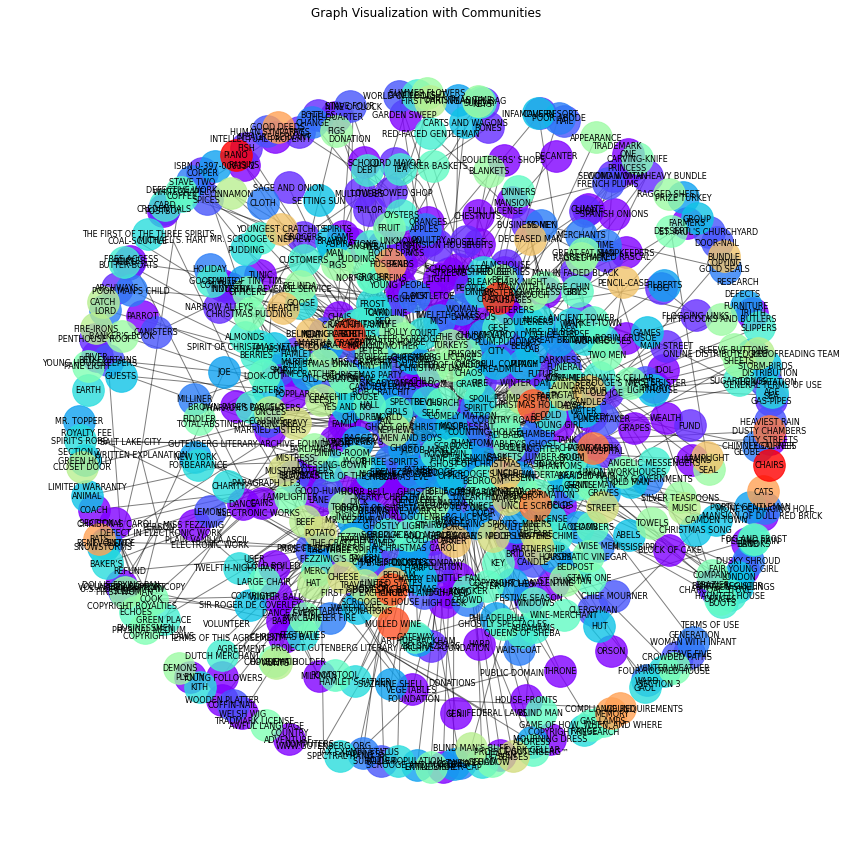

In [60]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
np.random.seed(2024)

# Convert partition into a dictionary where keys are node names, not indices
community_assignments = {}
for community_id, community in enumerate(partition):
    for node_index in community:
        node_name = list(G.nodes)[node_index]  # Map node index to node name
        community_assignments[node_name] = community_id

# Number of communities
num_communities = len(set(community_assignments.values()))

# Assign colors to each community
colors = plt.cm.rainbow(np.linspace(0, 1, num_communities))

plt.figure(figsize=(15, 15))

pos = nx.spring_layout(G, k=2.5, iterations=400, threshold=1e-4)

# Draw nodes with color corresponding to their community
for node, community_id in community_assignments.items():
    if node in pos:  
        nx.draw_networkx_nodes(G, pos,
                               nodelist=[node],
                               node_size=1000,
                               node_color=[colors[community_id]],
                               alpha=0.8)

nx.draw_networkx_edges(G, pos, width=1, alpha=0.5, edge_color='black')
nx.draw_networkx_labels(G, pos, font_size=8, font_family='sans-serif')

plt.title("Graph Visualization with Communities")
plt.axis('off')  # Turn off the axis
plt.show()



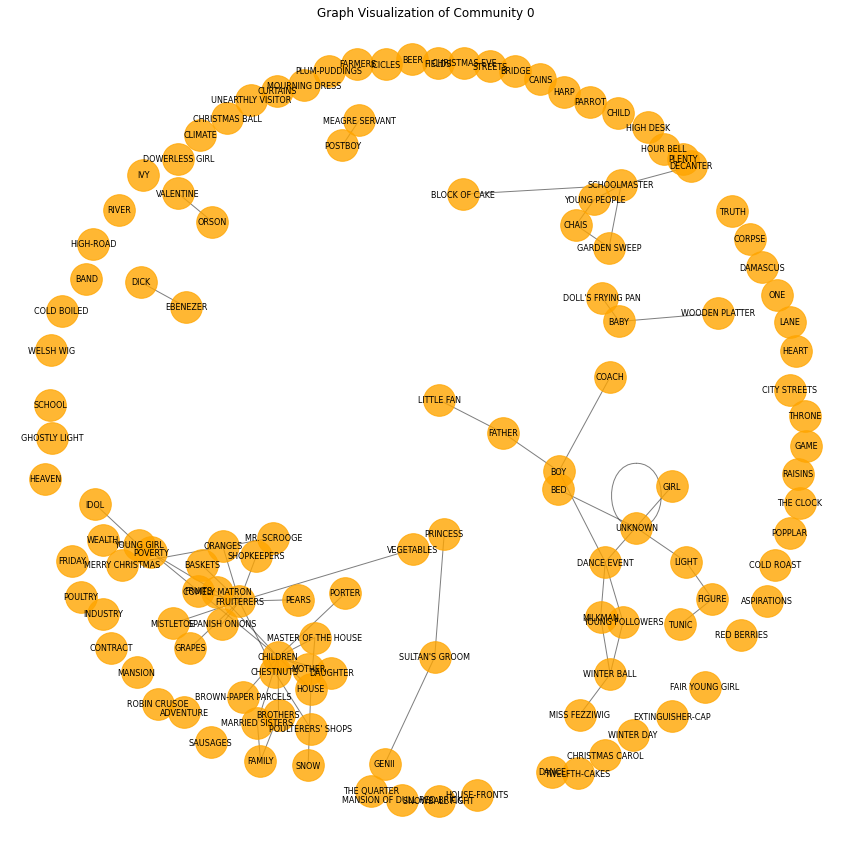

In [62]:
# Step 1: Extract nodes in community 0
community_0_nodes = [node for node, community_id in community_assignments.items() if community_id == 0]

# Step 2: Create a subgraph
G_community_0 = G.subgraph(community_0_nodes)

# Step 3: Visualize the subgraph
plt.figure(figsize=(15, 15))
pos_community_0 = nx.spring_layout(G_community_0, k=2.5, iterations=400, threshold=1e-4)

# Draw nodes with a distinct color for community 0
nx.draw_networkx_nodes(G_community_0, pos_community_0, node_size=1000, node_color='orange', alpha=0.8)
nx.draw_networkx_edges(G_community_0, pos_community_0, width=1, alpha=0.5, edge_color='black')
nx.draw_networkx_labels(G_community_0, pos_community_0, font_size=8, font_family='sans-serif')

plt.title("Graph Visualization of Community 0")
plt.axis('off') 
plt.show()


In [64]:
print(G_community_0)

Graph with 126 nodes and 60 edges


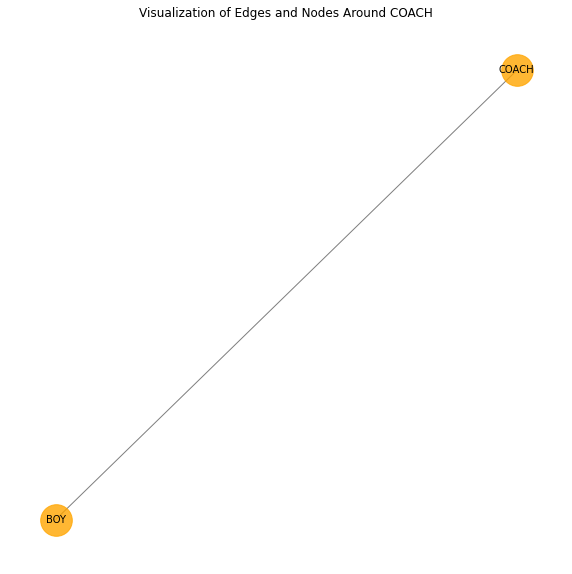

Target Nodes and their Communities:
COACH: Community 0
BOY: Community 0


In [83]:
import networkx as nx
import matplotlib.pyplot as plt

# Assuming G is your original graph and community_assignments is defined
node_coach = 'COACH'

# Step 1: Find the edges connected to COACH
edges_coach = list(G.edges(node_coach))

# Step 2: Extract the target nodes
target_nodes = set([target for _, target in edges_coach] + [source for source, _ in edges_coach])

# Step 3: Get communities for target nodes
target_communities = {node: community_assignments[node] for node in target_nodes}

# Step 4: Find the component for target nodes
target_components = {node: list(nx.connected_components(G)) for node in target_nodes}

# Step 5: Create a subgraph for visualization
subgraph_nodes = [node_coach] + list(target_nodes)
G_sub = G.subgraph(subgraph_nodes)

# Step 6: Visualize the subgraph
plt.figure(figsize=(10, 10))
pos = nx.spring_layout(G_sub, k=2.5, iterations=400)

# Draw the nodes and edges
nx.draw_networkx_nodes(G_sub, pos, node_size=1000, node_color='orange', alpha=0.8)
nx.draw_networkx_edges(G_sub, pos, width=1, alpha=0.5, edge_color='black')
nx.draw_networkx_labels(G_sub, pos, font_size=10, font_family='sans-serif')

plt.title(f"Visualization of Edges and Nodes Around {node_coach}")
plt.axis('off')  # Turn off the axis
plt.show()

# Output community and component information
print("Target Nodes and their Communities:")
for node, community in target_communities.items():
    print(f"{node}: Community {community}")



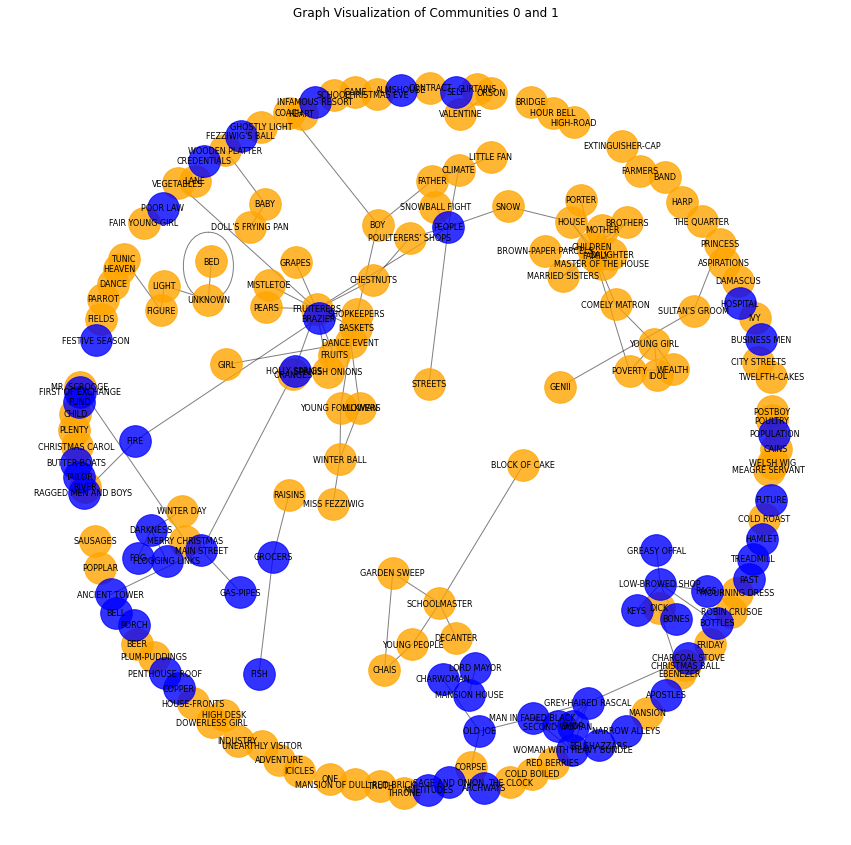

In [77]:
community_0_nodes = [node for node, community_id in community_assignments.items() if community_id == 0]
community_1_nodes = [node for node, community_id in community_assignments.items() if community_id == 1]

combined_community_nodes = community_0_nodes + community_1_nodes
G_combined_communities = G.subgraph(combined_community_nodes)

plt.figure(figsize=(15, 15))
pos_combined = nx.spring_layout(G_combined_communities, k=2.5, iterations=400, threshold=1e-4)

# Draw nodes for community 0
nx.draw_networkx_nodes(G_combined_communities, pos_combined, nodelist=community_0_nodes, 
                       node_size=1000, node_color='orange', alpha=0.8)
# Draw nodes for community 1
nx.draw_networkx_nodes(G_combined_communities, pos_combined, nodelist=community_1_nodes, 
                       node_size=1000, node_color='blue', alpha=0.8)

# Draw edges
nx.draw_networkx_edges(G_combined_communities, pos_combined, width=1, alpha=0.5, edge_color='black')

# Draw labels
nx.draw_networkx_labels(G_combined_communities, pos_combined, font_size=8, font_family='sans-serif')

plt.title("Graph Visualization of Communities 0 and 1")
plt.axis('off')  # Turn off the axis
plt.show()


In [124]:
# Step 1: Check edges for RAISINS
raisin_edges = list(G.edges('RAISINS'))

# Step 2: Count connections to each community
community_0_neighbors = sum(1 for _, target in raisin_edges if community_assignments[target] == 0)
community_1_neighbors = sum(1 for _, target in raisin_edges if community_assignments[target] == 1)

print(f"Connections to Community 0: {community_0_neighbors}")
print(f"Connections to Community 1: {community_1_neighbors}")

# Step 3: Calculate modularity contribution if needed (hypothetical)
# This is a simplified way to represent what the modularity would consider
modularity_score = (community_0_neighbors - community_1_neighbors) / len(raisin_edges)
print(f"Modularity Score Contribution: {modularity_score}")


Connections to Community 0: 0
Connections to Community 1: 1
Modularity Score Contribution: -0.5


## When calculating contributions of individual nodes, a negative score (like -0.5) implies that the existing community assignment is not optimal for that node.

## In other words, the modularity score contribution calculated as -0.5 suggests that placing RAISINS in community 0 would decrease the modularity score. This negative value reflects that the community structure would be less optimal if RAISINS were in community 0 compared to if it were in community 1.

# Characteristics of an Optimal Community Detection Model

##       Dense Internal Connections: 
### Nodes within the same community should have more edges connecting them than edges connecting to nodes in other communities.

##       Fewer Isolated Nodes: 
### Nodes in a community should not be isolated from each other.

##       Balanced Edge Distribution: 
### Nodes should not predominantly connect to nodes in other communities if they belong to a particular community.

In [140]:
#community_assignments.items()
print(G)

Graph with 686 nodes and 1049 edges


# Greedy Modularity Communities

In [150]:
communities = nx.algorithms.community.greedy_modularity_communities(G)
print(len(communities))
print(len(communities[0]))
communities

97
159


[frozenset({'ABELS',
            'ABRAHAMS',
            'ALI BABA',
            'ANGELIC MESSENGERS',
            'ANIMAL',
            'APOSTLES',
            'APPEARANCE',
            'AROMATIC VINEGAR',
            "BANKER'S BOOK",
            'BED',
            'BEDLAM',
            'BEDPOST',
            'BEDROOM',
            'BEEF',
            'BELSHAZZARS',
            'BELT',
            'BODY',
            'BOY',
            'BRAIDED HAIR',
            'BRIDGE',
            'BUSINESSMEN',
            'BUTTER-BOATS',
            'CAB',
            'CAINS',
            'CHAIR',
            'CHAMBER',
            'CHAMBERS',
            'CHEESE',
            'CHRISTMAS CAROL',
            'CHRISTMAS TIME',
            'CHURCH',
            'CHURCH AND CHAPEL',
            'CHURCHES',
            'CITY OF LONDON',
            'CITY STREETS',
            'CLOCK',
            'COACH',
            'COLD',
            'CORNER',
            'CROWD',
            'CURTAINS',
         

### frozenset is immutable, meaning it cannot be changed after creation. 

In [147]:
community_list = [list(community) for community in communities]
community_list
len(community_list[0])

159

In [151]:
community_list

[['FATHER',
  'WELFARE',
  'FOG AND FROST',
  'GRUEL',
  'CURTAINS',
  'LITTLE SHOE',
  'BEDPOST',
  'WINTER FIRE',
  'PARLIAMENT',
  'COLD',
  'DINING-ROOM',
  'POOR ABODE',
  'GLOOM',
  'OFFICES',
  'TAVERN',
  'GRAVY',
  'BODY',
  'PRESENT',
  'CORNER',
  'MANSION',
  'CHRISTMAS TIME',
  'YES AND NO',
  'OFFICERS',
  'ORSON',
  'YOUNG HOUSEKEEPERS',
  'BELT',
  'TANK',
  'CHURCHES',
  'GRAVES',
  'BUSINESSMEN',
  "SCROOGE AND MARLEY'S",
  'LIGHT',
  'TUNIC',
  'POPPLAR',
  'BEDLAM',
  'POOR CLERK',
  'PLUM-PUDDINGS',
  'DRESSING-GOWN',
  'ABRAHAMS',
  'STAIRS',
  'UNEARTHLY VISITOR',
  'BRAIDED HAIR',
  'SHADOW',
  'ALI BABA',
  'PHANTOM',
  'SITTING-ROOM',
  'STAVE FOUR',
  'TURKEY',
  'GUESTS',
  'COACH',
  'CHURCH AND CHAPEL',
  "POULTERER'S",
  'WISE MEN',
  'DECEASED PARTNER',
  'SISTERS',
  'GESE',
  "POOR MAN'S CHILD",
  'LITTLE FAN',
  'DUSTY CHAMBERS',
  'TERRORS',
  'SLIPPERS',
  'MANSION OF DULL RED BRICK',
  'CITY OF LONDON',
  'WARD',
  'APPEARANCE',
  'FIGURE',
  'BOY'

In [188]:
import networkx as nx

# Step 1: Use the greedy modularity communities function
communities = nx.algorithms.community.greedy_modularity_communities(G)

# Step 2: Convert communities to a list of lists
community_list = [list(community) for community in communities]

# Step 3: Calculate Modularity
modularity_score = nx.algorithms.community.modularity(G, community_list)
print(f"Modularity Score of Greedy: {modularity_score}")


Modularity Score of Greedy: 0.5237378759825437


## nx.algorithms.community.modularity calculates the modularity of a given partition of a graph. Modularity quantifies the strength of the division of a network into communities.

# Leiden Communities

In [161]:
print(partition)

Clustering with 610 elements and 19 clusters
[ 0] SCROOGE, SHIP, HOLLY, PARTNERSHIP, WINTER WEATHER, UNCLE, WORLD OF FOOLS,
     HEART, PARLIAMENT, BEDLAM, GENTLEMEN, UNION WORKHOUSES, TREADMILL,
     POPULATION, ST. DUNSTAN, HAT, TAVERN, DECEASED PARTNER, BANKER'S BOOK,
     CITY OF LONDON, GATEWAY, CHAMBERS, KEY, WINE-MERCHANT, STAIRS, GRUEL,
     SITTING-ROOM, BEDROOM, LUMBER-ROOM, DRESSING-GOWN, SLIPPERS, CAINS,
     ABELS, PHARAOH'S DAUGHTERS, QUEENS OF SHEBA, ANGELIC MESSENGERS,
     ABRAHAMS, BELSHAZZARS, APOSTLES, BUTTER-BOATS, SENSES, BEEF, MUSTARD,
     CHEESE, POTATO, GRAVY, CHAIR, APPEARANCE, WARD, WISE MEN, POOR ABODE,
     CROWD, INVISIBLE WORLD, WINDOW, CHAMBER, TIME, THE VISITATION, THE CLOCK,
     THE CHIME, THE QUARTER, HOUR BELL, CURTAINS, UNEARTHLY VISITOR, WELFARE,
     BRIDGE, RIVER, MANSION, TRAVELLERS, HIGH-ROAD, LANE, MANSION OF DULL RED
     BRICK, ALI BABA, POPPLAR, DAMASCUS, VALENTINE, ROBIN CRUSOE, FRIDAY,
     PARROT, CHRISTMAS CAROL, FAIR YOUNG GIRL, DOWE

In [187]:
community_assignments = {}
for community_id, community in enumerate(partition):
    for node_index in community:
        node_name = list(G.nodes)[node_index]  
        community_assignments[node_name] = community_id
#community_assignments

In [189]:
igraph = ig.Graph.TupleList(G.edges(data=True), directed=False)
partition = leidenalg.find_partition(igraph, leidenalg.ModularityVertexPartition)
modularity_score_igraph = igraph.modularity(partition)  
print(f"Modularity Score from iGraph of Leiden: {modularity_score_igraph}")

Modularity Score from iGraph of Leiden: 0.6545177621612485


# Louvain Community

In [182]:
import community as community_louvain

# Detect communities using Louvain method
louvain_partition = community_louvain.best_partition(G)

# Create a list of communities from the Louvain output
louvain_community_list = {}
for node, community_id in louvain_partition.items():
    if community_id not in louvain_community_list:
        louvain_community_list[community_id] = []
    louvain_community_list[community_id].append(node)

# Convert to a list of lists
louvain_community_list = list(louvain_community_list.values())

# Calculate Modularity using NetworkX
modularity_score_louvain = nx.algorithms.community.modularity(G, louvain_community_list)
print(f"Modularity Score from Louvain Communities: {modularity_score_louvain}")


Modularity Score from Louvain Communities: 0.5906095512258616


In [183]:
louvain_partition

{'PROJECT GUTENBERG': 0,
 'CHARLES DICKENS': 1,
 'ARTHUR RACKHAM': 1,
 'A CHRISTMAS CAROL': 1,
 'PHILADELPHIA': 1,
 'NEW YORK': 1,
 'JANET BLENKINSHIP': 1,
 'ONLINE DISTRIBUTED PROOFREADING TEAM': 1,
 'SUZANNE SHELL': 1,
 'J. B. LIPPINCOTT COMPANY': 1,
 'EBENEZER SCROOGE': 1,
 'GREAT BRITAIN': 2,
 'ISBN 0-397-00033-2': 3,
 'GHOST': 4,
 'BOB CRATCHIT': 5,
 'PETER CRATCHIT': 5,
 'TIM CRATCHIT': 5,
 'MR. FEZZIWIG': 1,
 'FRED': 6,
 'GHOST OF CHRISTMAS PAST': 1,
 'GHOST OF CHRISTMAS PRESENT': 4,
 'GHOST OF CHRISTMAS YET TO COME': 1,
 'GHOST OF JACOB MARLEY': 1,
 'FEZZIWIG': 7,
 'JOE': 11,
 'MR. TOPPER': 9,
 'DICK WILKINS': 1,
 'BELLE': 1,
 'CAROLINE': 10,
 'MRS. CRATCHIT': 5,
 'BELINDA CRATCHIT': 5,
 'MARTHA CRATCHIT': 5,
 'MRS. DILBER': 11,
 'FAN': 30,
 'MRS. FEZZIWIG': 7,
 "MARLEY'S GHOST": 1,
 'THE FIRST OF THE THREE SPIRITS': 14,
 'CHRISTMAS EVE': 7,
 "FEZZIWIG'S BALL": 1,
 'CORNHILL': 4,
 'THE THREE SPIRITS': 1,
 'CHRISTMAS': 30,
 'THE CRATCHIT FAMILY': 6,
 'JACOB MARLEY': 1,
 'OLD SCR

In [ ]:
modularity_score2 = nx.algorithms.community.modularity(igraph, leiden_community_list)

In [185]:
# Calculate modularity using iGraph
modularity_score_igraph = igraph.modularity(partition)  # Use the partition directly
print(f"Modularity Score from iGraph: {modularity_score_igraph}")


Modularity Score from iGraph: 0.656167615260255


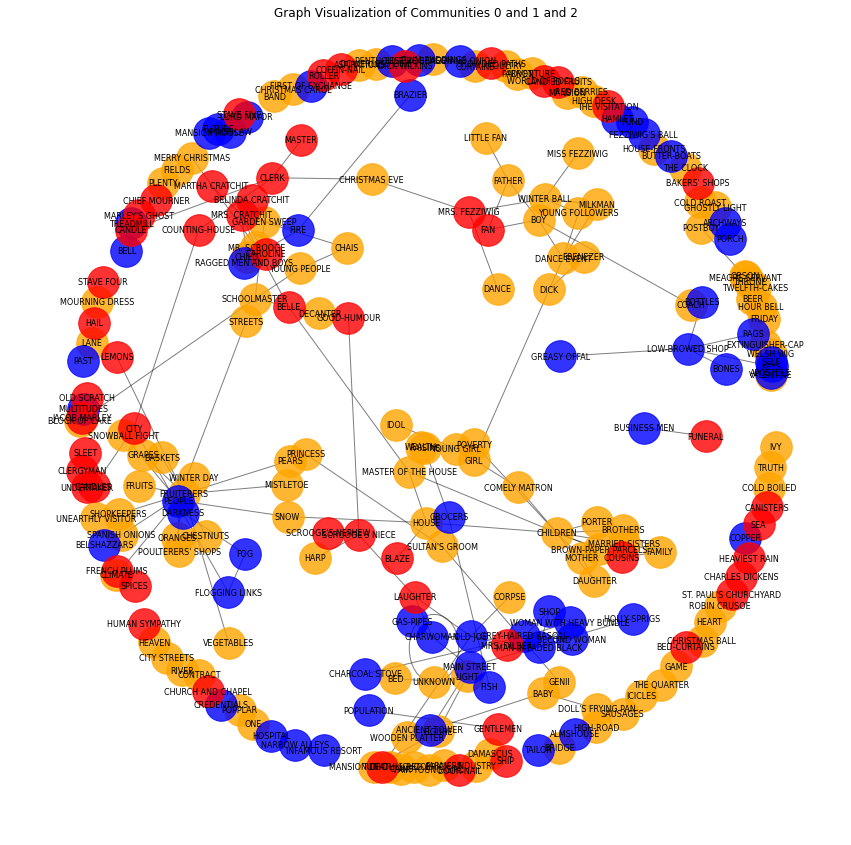

In [75]:
community_0_nodes = [node for node, community_id in community_assignments.items() if community_id == 0]
community_1_nodes = [node for node, community_id in community_assignments.items() if community_id == 1]
community_2_nodes = [node for node, community_id in community_assignments.items() if community_id == 2]

combined_community_nodes = community_0_nodes + community_1_nodes + community_2_nodes
G_combined_communities = G.subgraph(combined_community_nodes)

plt.figure(figsize=(15, 15))
pos_combined = nx.spring_layout(G_combined_communities, k=2.5, iterations=400, threshold=1e-4)

# Draw nodes for community 0
nx.draw_networkx_nodes(G_combined_communities, pos_combined, nodelist=community_0_nodes, 
                       node_size=1000, node_color='orange', alpha=0.8)
# Draw nodes for community 1
nx.draw_networkx_nodes(G_combined_communities, pos_combined, nodelist=community_1_nodes, 
                       node_size=1000, node_color='blue', alpha=0.8)
# Draw nodes for community 2
nx.draw_networkx_nodes(G_combined_communities, pos_combined, nodelist=community_2_nodes, 
                       node_size=1000, node_color='red', alpha=0.8)
# Draw edges
nx.draw_networkx_edges(G_combined_communities, pos_combined, width=1, alpha=0.5, edge_color='black')

# Draw labels
nx.draw_networkx_labels(G_combined_communities, pos_combined, font_size=8, font_family='sans-serif')

plt.title("Graph Visualization of Communities 0 and 1 and 2")
plt.axis('off')  # Turn off the axis
plt.show()

In [94]:
subgraph_nodes = [node_chris] + list(target_nodes)
G_sub = G.subgraph(subgraph_nodes)
print(G_sub)

Graph with 7 nodes and 13 edges


In [88]:
node_chris = 'CHRISTMAS EVE'
edges_chris = list(G.edges(node_chris))
target_nodes = set([target for _, target in edges_chris] + [source for source, _ in edges_chris])
target_communities = {node: community_assignments[node] for node in target_nodes}
target_components = {node: list(nx.connected_components(G)) for node in target_nodes}

print(edges_chris)
print("")
print(target_nodes)
print("")
print(target_communities)


[('CHRISTMAS EVE', 'EBENEZER SCROOGE'), ('CHRISTMAS EVE', 'BOB CRATCHIT'), ('CHRISTMAS EVE', 'FEZZIWIG'), ('CHRISTMAS EVE', 'MRS. FEZZIWIG'), ('CHRISTMAS EVE', 'SCROOGE'), ('CHRISTMAS EVE', 'CLERK')]

{'BOB CRATCHIT', 'EBENEZER SCROOGE', 'CLERK', 'SCROOGE', 'MRS. FEZZIWIG', 'CHRISTMAS EVE', 'FEZZIWIG'}

{'BOB CRATCHIT': 4, 'EBENEZER SCROOGE': 4, 'CLERK': 2, 'SCROOGE': 5, 'MRS. FEZZIWIG': 2, 'CHRISTMAS EVE': 0, 'FEZZIWIG': 4}


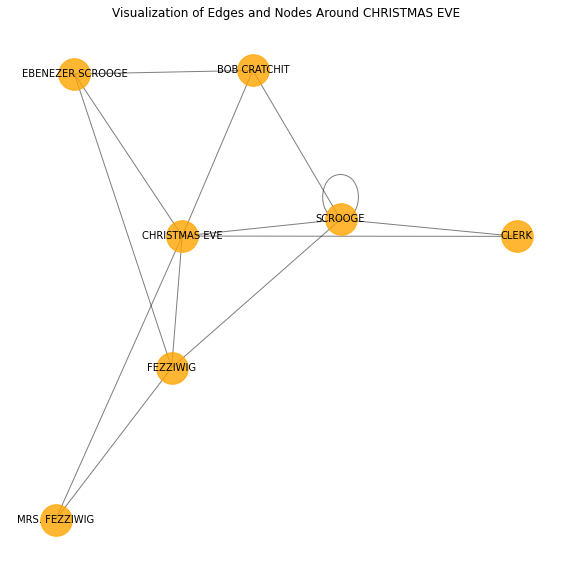

In [89]:
subgraph_nodes = [node_chris] + list(target_nodes)
G_sub = G.subgraph(subgraph_nodes)

plt.figure(figsize=(10, 10))
pos = nx.spring_layout(G_sub, k=2.5, iterations=400)

nx.draw_networkx_nodes(G_sub, pos, node_size=1000, node_color='orange', alpha=0.8)
nx.draw_networkx_edges(G_sub, pos, width=1, alpha=0.5, edge_color='black')
nx.draw_networkx_labels(G_sub, pos, font_size=10, font_family='sans-serif')

plt.title(f"Visualization of Edges and Nodes Around {node_coach}")
plt.axis('off')  # Turn off the axis
plt.show()

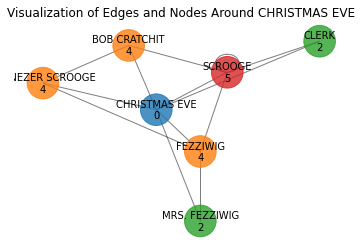

In [91]:
import networkx as nx
import matplotlib.pyplot as plt

node_chris = 'CHRISTMAS EVE'
edges_chris = list(G.edges(node_chris))
target_nodes = set([target for _, target in edges_chris] + [source for source, _ in edges_chris])
subgraph_nodes = [node_chris] + list(target_nodes)
G_sub = G.subgraph(subgraph_nodes)

community_colors = {}
for node in subgraph_nodes:
    community_id = community_assignments[node]
    if community_id not in community_colors:
        # Generate a random color for the community
        community_colors[community_id] = plt.cm.tab10(len(community_colors))  # Use tab10 colormap

pos = nx.spring_layout(G_sub, k=2.5, iterations=400)

nx.draw_networkx_nodes(G_sub, pos, node_size=1000, 
                        node_color=[community_colors[community_assignments[node]] for node in G_sub.nodes()],
                        alpha=0.8)

nx.draw_networkx_edges(G_sub, pos, width=1, alpha=0.5, edge_color='black')

labels = {node: f"{node}\n{community_assignments[node]}" for node in G_sub.nodes()}
nx.draw_networkx_labels(G_sub, pos, labels=labels, font_size=10, font_family='sans-serif')

plt.title(f"Visualization of Edges and Nodes Around {node_chris}")
plt.axis('off')  
plt.show()


In [98]:
community_assignments[subgraph_nodes[1]]

4

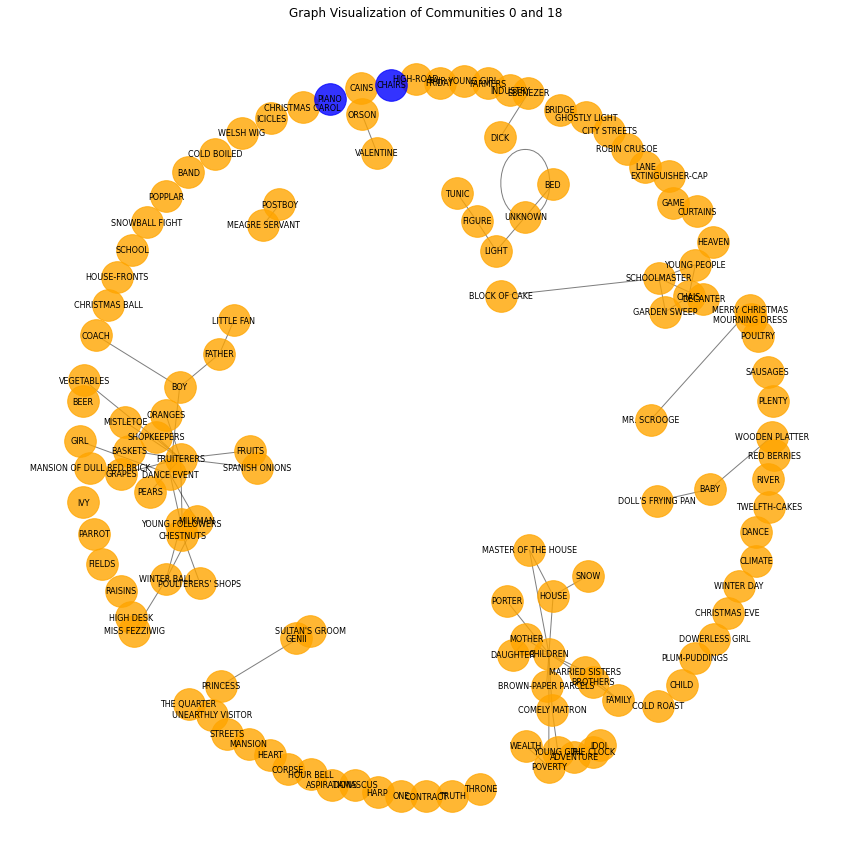

In [76]:
community_0_nodes = [node for node, community_id in community_assignments.items() if community_id == 0]
community_18_nodes = [node for node, community_id in community_assignments.items() if community_id == 18]

combined_community_nodes = community_0_nodes + community_18_nodes
G_combined_communities = G.subgraph(combined_community_nodes)

plt.figure(figsize=(15, 15))
pos_combined = nx.spring_layout(G_combined_communities, k=2.5, iterations=400, threshold=1e-4)

# Draw nodes for community 0
nx.draw_networkx_nodes(G_combined_communities, pos_combined, nodelist=community_0_nodes, 
                       node_size=1000, node_color='orange', alpha=0.8)
# Draw nodes for community 7
nx.draw_networkx_nodes(G_combined_communities, pos_combined, nodelist=community_18_nodes, 
                       node_size=1000, node_color='blue', alpha=0.8)

# Draw edges
nx.draw_networkx_edges(G_combined_communities, pos_combined, width=1, alpha=0.5, edge_color='black')

# Draw labels
nx.draw_networkx_labels(G_combined_communities, pos_combined, font_size=8, font_family='sans-serif')

plt.title("Graph Visualization of Communities 0 and 18")
plt.axis('off')  # Turn off the axis
plt.show()

## The two blue nodes appear isolated, with no edges connecting them to any other nodes. This situation indicates they are disconnected from the rest of the community and possibly represent unique or specialized cases that do not share relationships with others in the dataset.

## The isolation of these nodes could imply they either have distinct characteristics or contexts that make them stand out from the rest of the community.

In [ ]:
1

In [74]:
1

1